In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('dark_background')

#ignorando Warning inuteis
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#definindo quantidade de linhas e colunas visiveis
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import yfinance as yf
import pandas as pd

import datetime

import seaborn as sns

# ANALISE CRIPTOS ======================================

In [2]:
cryptos_nome = {} ###################################################
cryptos = [] ###################################################

def crypto_df_download(moeda, ano_inicio, nome):
    cryptos_nome[moeda] = nome
    df = yf.download(moeda, start=str(ano_inicio)+"-01-01", end="2024-02-19")
    cryptos.append(df)
    return df

################################################################################################
ano = '2015'

# Defi Famosas
BTC = crypto_df_download("BTC-USD", ano, 'Bitcoin') 
BNB = crypto_df_download("BNB-USD", ano, 'Binance Coin')
ETH = crypto_df_download("ETH-USD", ano, 'Ethereum')
SOL = crypto_df_download("SOL-USD", ano, 'Solana')
AVAX = crypto_df_download("AVAX-USD", ano, 'Avalanche')
ADA = crypto_df_download("ADA-USD", ano, 'Cardano')
XRP = crypto_df_download("XRP-USD", ano, 'XRP')

# Moedas de IA
RNDR = crypto_df_download("RNDR-USD", ano, 'Render Token')
GRT = crypto_df_download("GRT-USD", ano, 'The Graph')
AGIX = crypto_df_download("AGIX-USD", ano, 'SingularityNET')
OCEAN = crypto_df_download("OCEAN-USD", ano, 'Ocean Protocol')
INJ = crypto_df_download("INJ-USD", ano, "Injective Protocol")
KAS = crypto_df_download("KAS-USD", ano, "Kaspa")
CSPR = crypto_df_download("CSPR-USD", ano, "Casper")
PLA = crypto_df_download("PLA-USD", ano, "Planet")
LMWR = crypto_df_download("LMWR-USD", ano, "Limewire")
INSP = crypto_df_download("INSP-USD", ano, "Inspect") 
BCH = crypto_df_download("BCH-USD", ano, "Bitcoin Cash")

cryptos_nome = {k.replace('-USD', ''): v for k, v in cryptos_nome.items()}

################################################################################################

def head_tail(df):
    display(pd.concat([df.head(2), df.tail(2)]))
    
count = 0
for i in cryptos:
    #print('='*40, crypto_names[count], '='*40)
    #head_tail(i)
    
    count += 1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [3]:
def lucro_perda(valor_atual, valor_anterior):
    return ((valor_atual-valor_anterior)/valor_anterior)*100
    
def mudanca_percentual(df, pular_periodo, nome_coluna):
    df[nome_coluna] = np.nan
    for i in range(len(df)):
        if i > pular_periodo-1: #definindo aonde começará a calcular
            df[nome_coluna][df.index[i]] = lucro_perda(df['Close'][df.index[i-pular_periodo]], 
                                                       df['Close'][df.index[i]])

################################################################################################

for i in cryptos:
    mudanca_percentual(i, 1, 'mudança')

In [4]:
data = '2024-02-11'
data = datetime.datetime.strptime(data, '%Y-%m-%d')
data2 = '2024-02-04'
data2 = datetime.datetime.strptime(data2, '%Y-%m-%d')
data2 = '2024-02-04'
data2 = datetime.datetime.strptime(data2, '%Y-%m-%d')

for df, nome in zip(cryptos, cryptos_nome.values()):
    try:
        print("="*20, nome, "="*20)
        
        valor_atual = df.tail(1)['Close'][0] # ULTIMA DATA
        mundanca_7d = lucro_perda(valor_atual, df.loc[data]['Close'])
        print(mundanca_7d)
        mundanca_14d = lucro_perda(valor_atual, df.loc[data2]['Close'])
        print(mundanca_14d)
    except:
        pass

==================== Bitcoin ====================
7.92776620179673
22.40056939491333
==================== Binance Coin ====================
9.006716982036739
14.749183543505806
==================== Ethereum ====================
14.812244833978824
25.745360328625104
==================== Solana ====================
4.353111815206965
17.488738533568966
==================== Avalanche ====================
1.3147808628154602
15.524950390862854
==================== Cardano ====================
14.281961738137888
25.184927425214866
==================== XRP ====================
5.858189656393305
10.652953520411673
==================== Render Token ====================
26.30398860190383
25.699746669355406
==================== The Graph ====================
==================== SingularityNET ====================
52.80806150544469
65.73755357638983
==================== Ocean Protocol ====================
42.52684042687916
67.6674435196195
==================== Injective Protocol ==================

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== BTC ==================================================


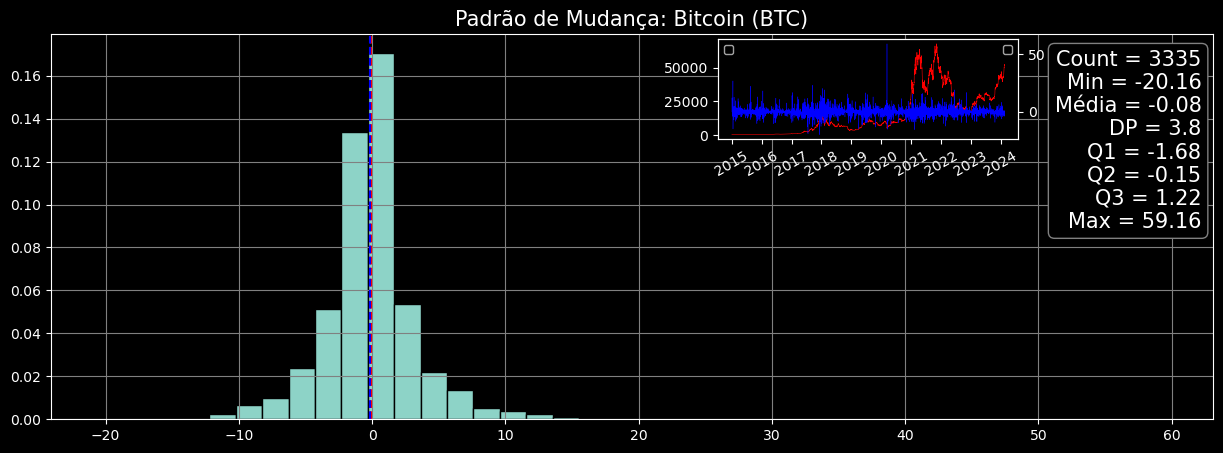

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== BNB ==================================================


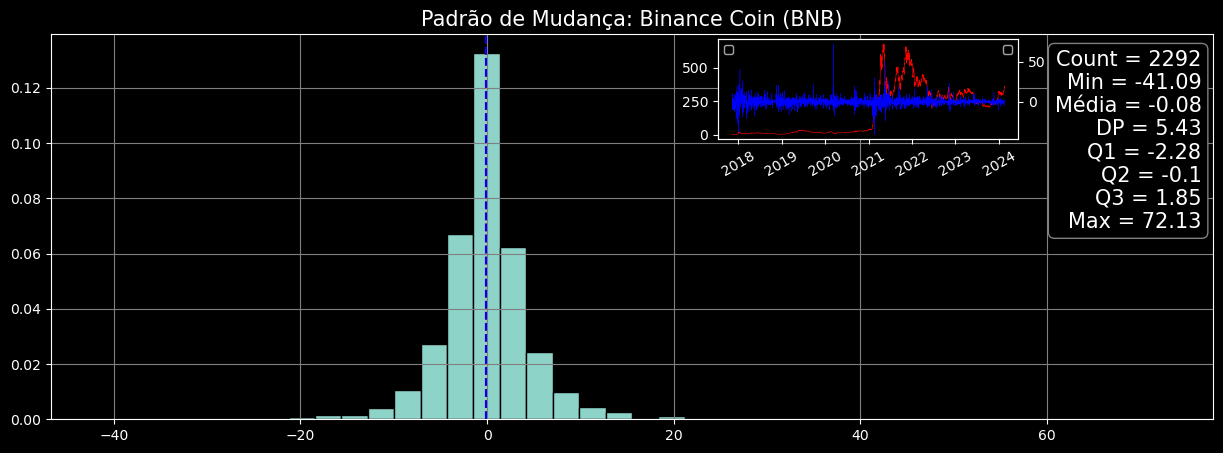

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== ETH ==================================================


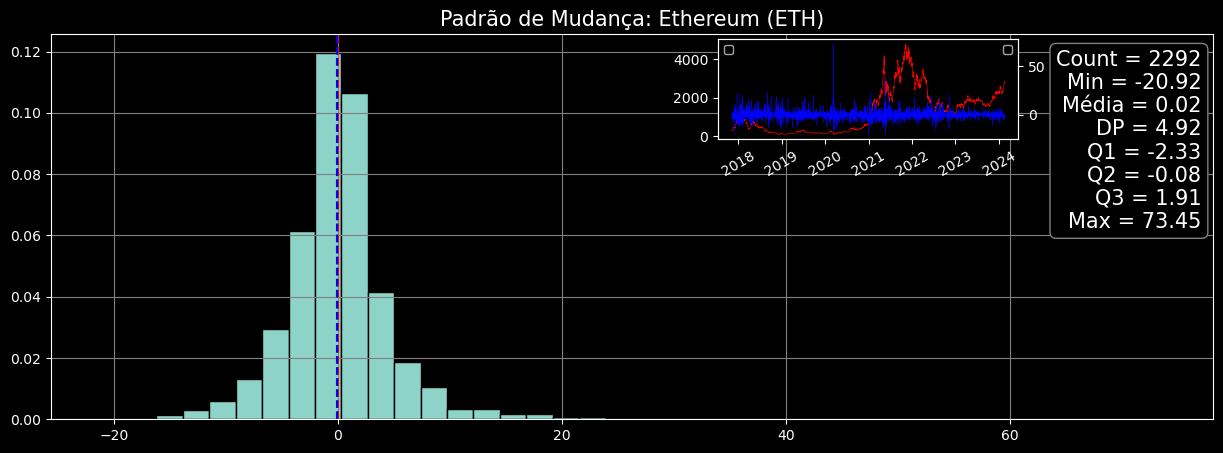

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== SOL ==================================================


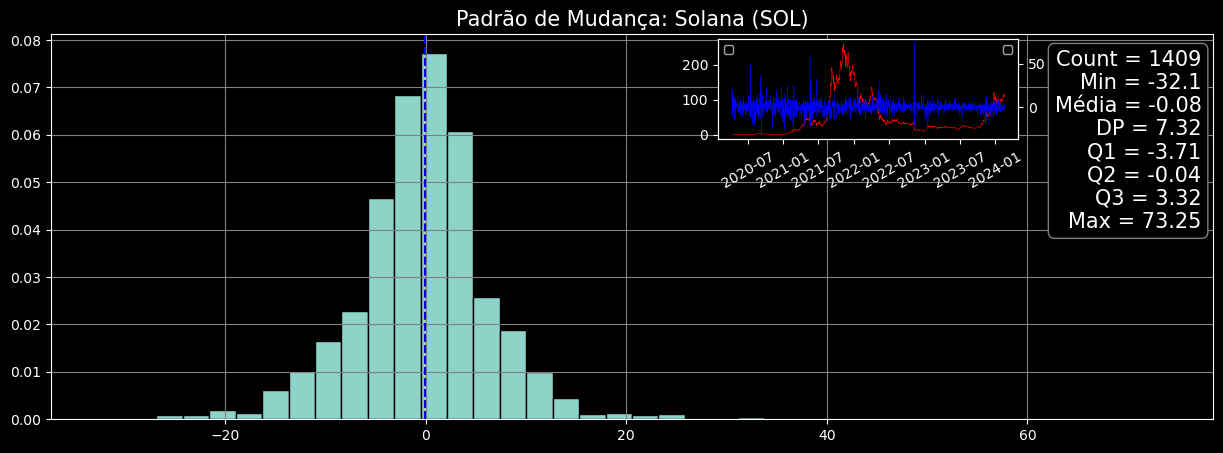

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== AVAX ==================================================


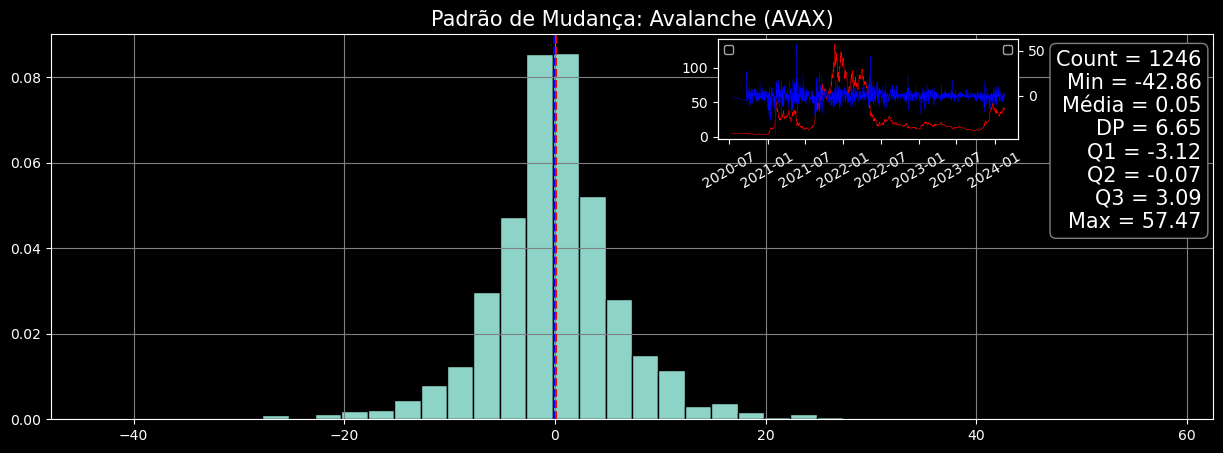

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== ADA ==================================================


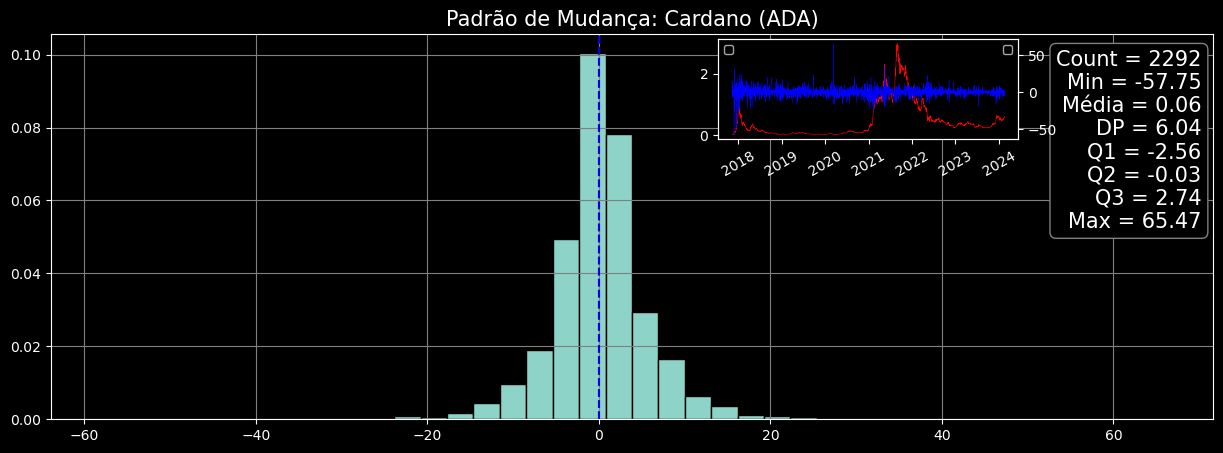

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== XRP ==================================================


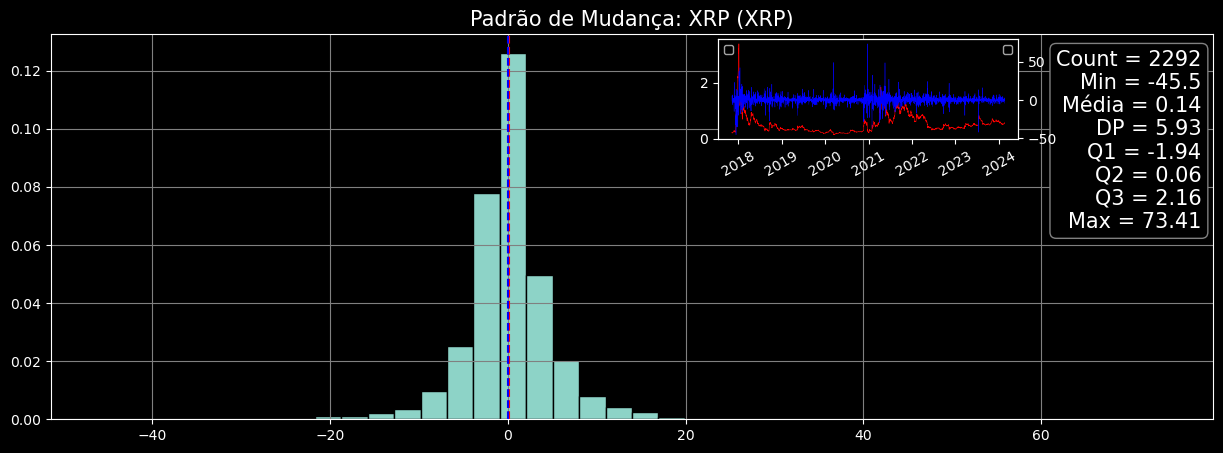

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== RNDR ==================================================


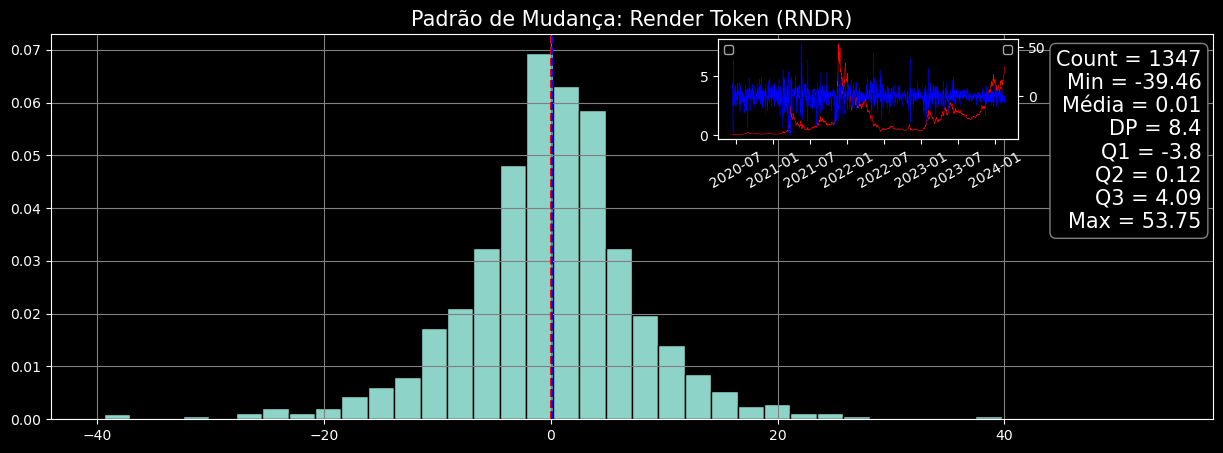

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== GRT ==================================================


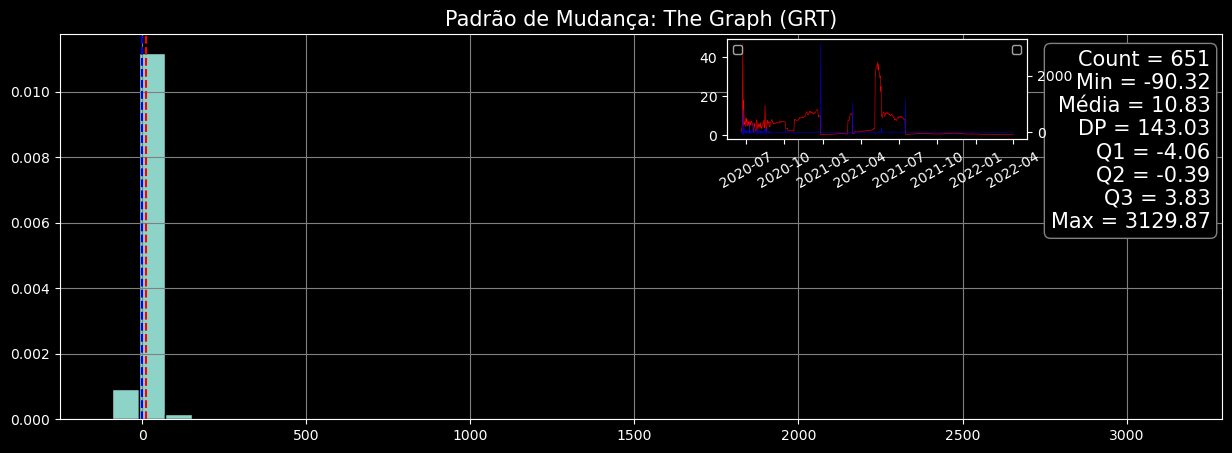

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== AGIX ==================================================


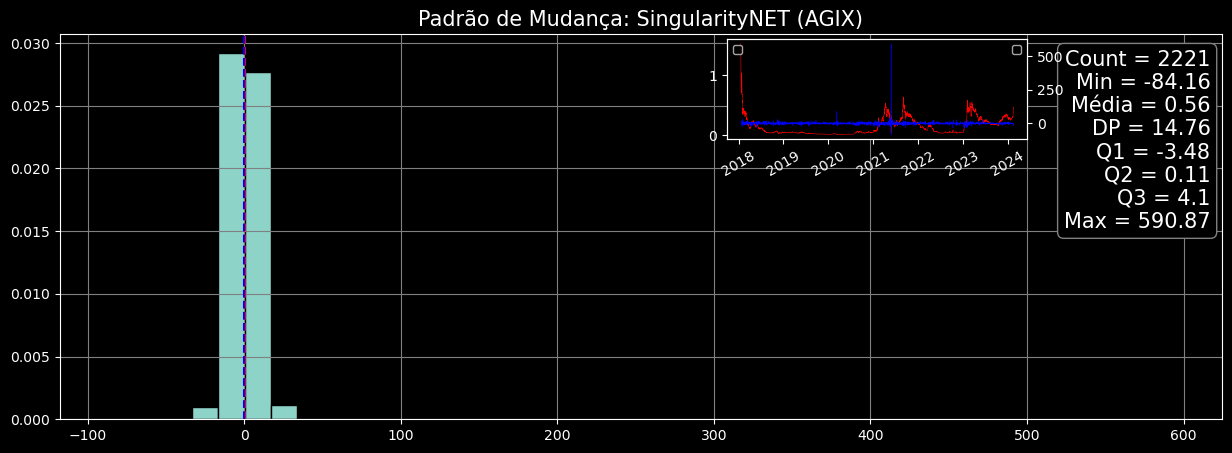

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== OCEAN ==================================================


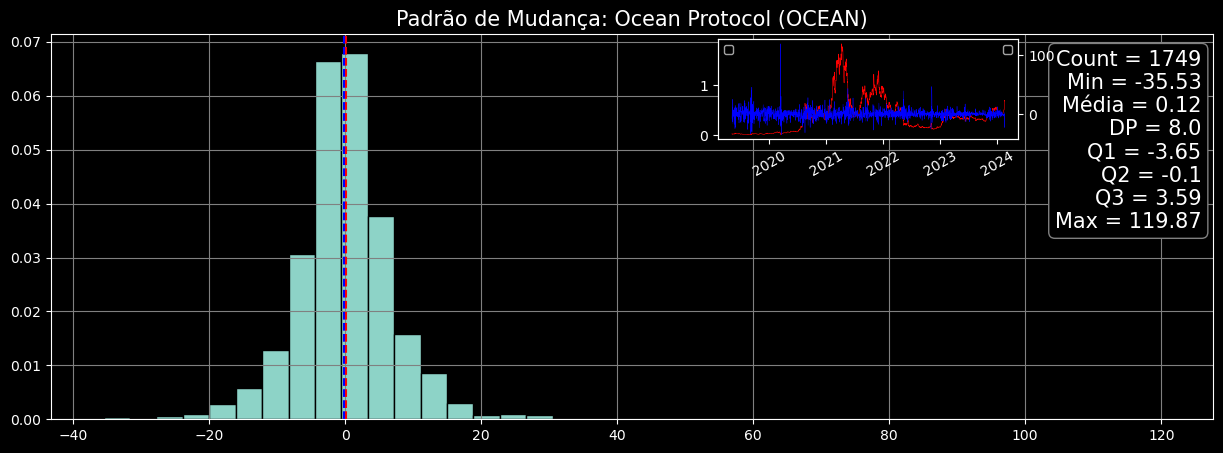

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== INJ ==================================================


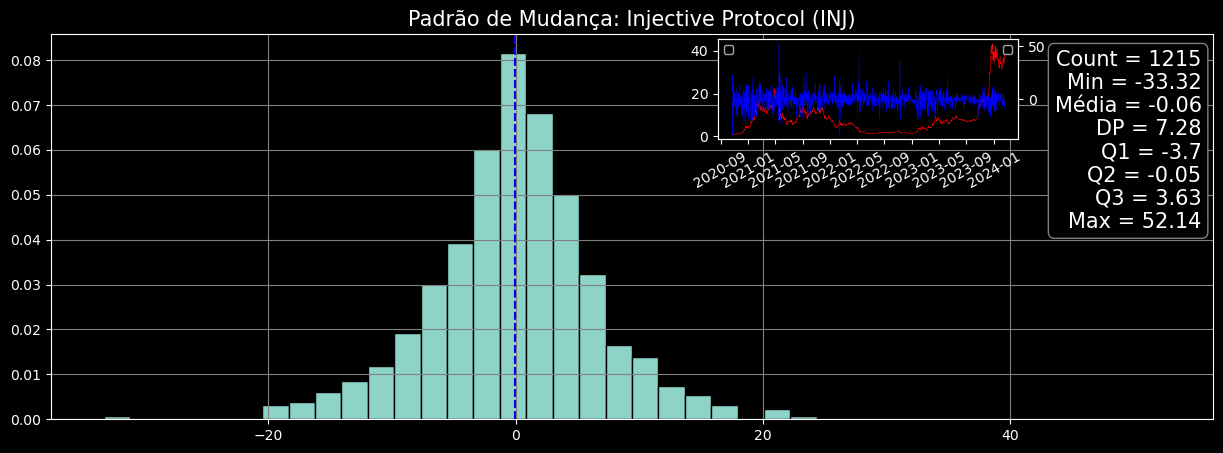

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== KAS ==================================================


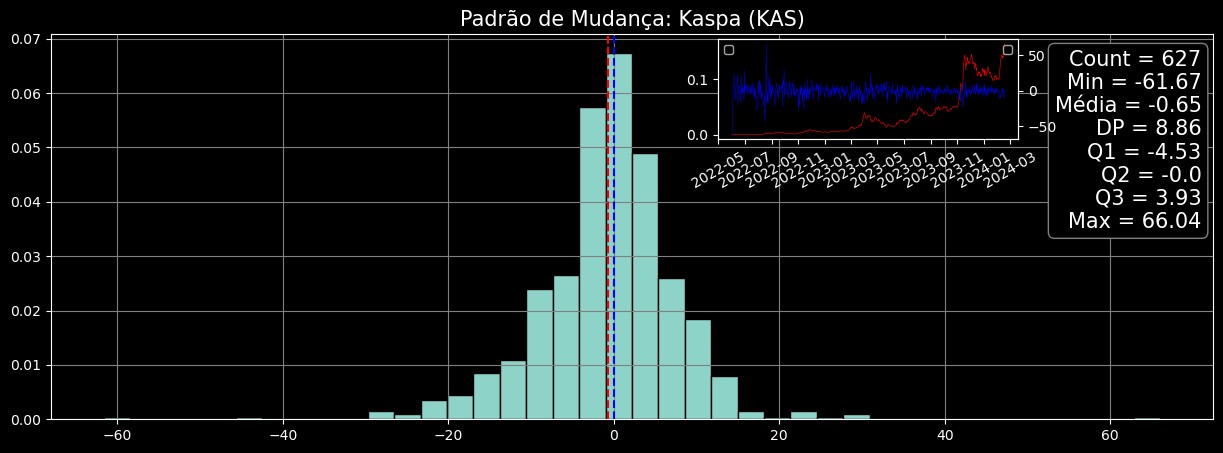

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== CSPR ==================================================


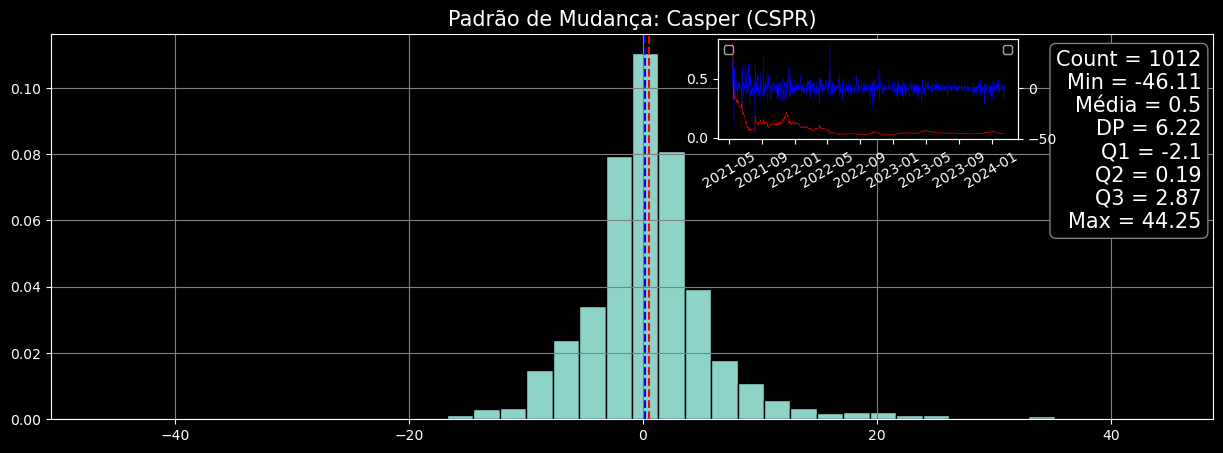

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== PLA ==================================================


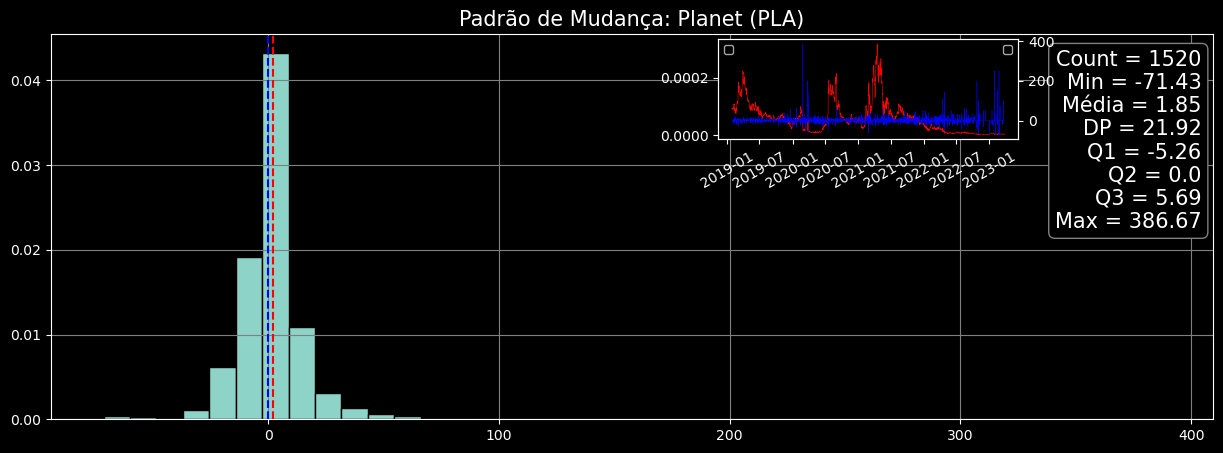

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== LMWR ==================================================


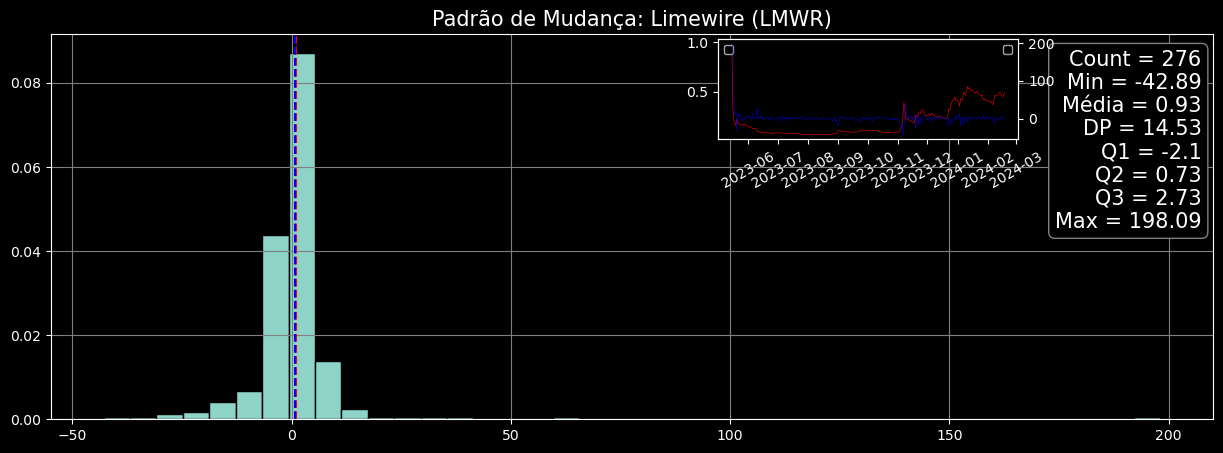

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== INSP ==================================================


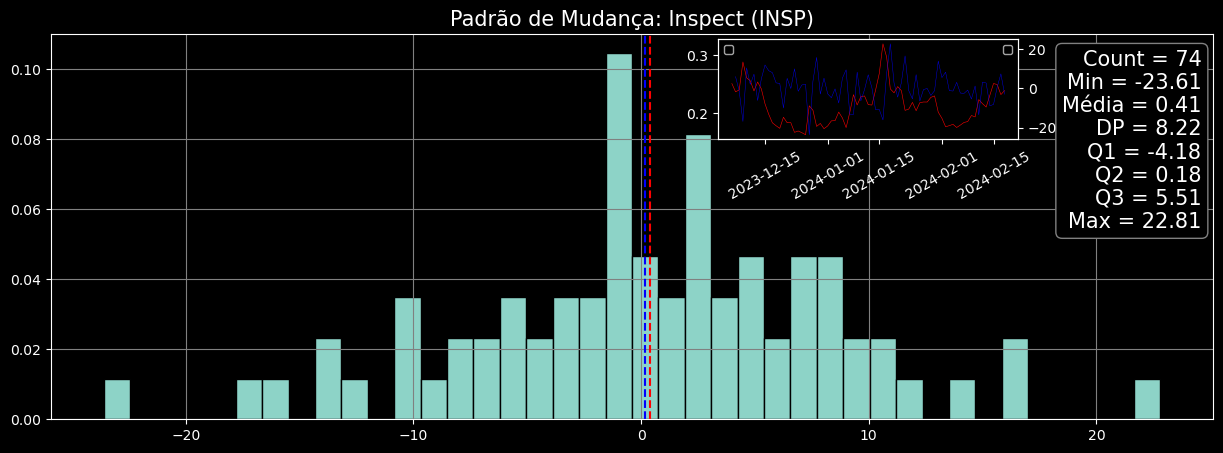

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== BCH ==================================================


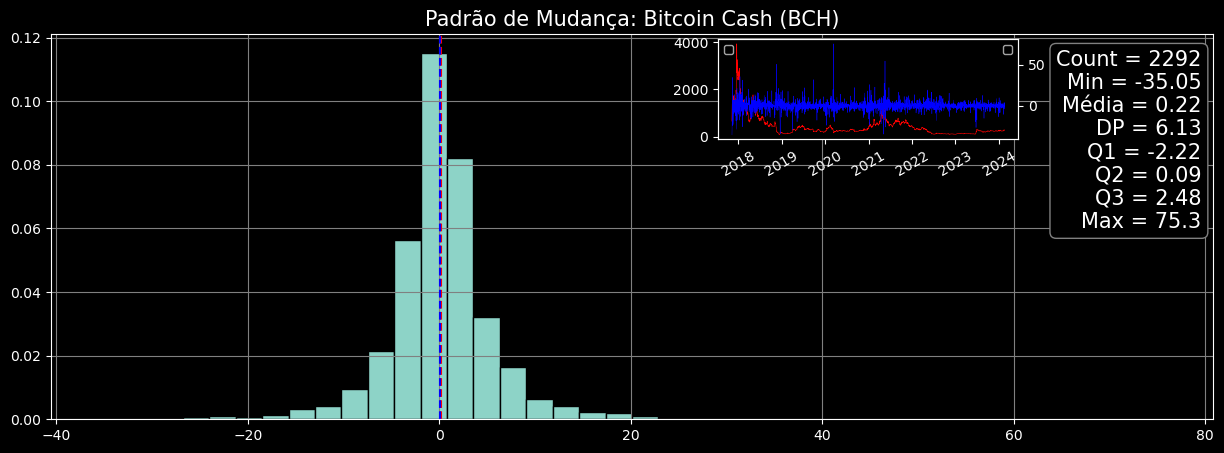

In [5]:
def calculo(valor_investido, df, inicio, fim):
    if pd.isna(inicio) or pd.isna(fim) or len(df) == 0 or df.empty:
        pass
    else:
        lucro = lucro_perda(fim, inicio)/100
        lucro = round(lucro, 2)
        montante = valor_investido + lucro*valor_investido
        montante = round(montante, 2)
        montante_em_real = 4.90*montante
        montante_em_real = round(montante_em_real, 2)
        return print(lucro, montante)
    
###############################################

def hist_mudanca(df, nome_moeda, coluna):
    if df[coluna].isna().all():
        pass
    else:
        plt.figure(figsize=(15,5))
        plt.hist(df[coluna], edgecolor='black', bins=40, density=True)

        plt.title('Padrão de Mudança: '+ nome_moeda, fontsize=15)
        plt.grid(True, color='gray')

        # Adicionar linhas verticais para média e mediana
        plt.axvline(x = df[coluna].mean(), color='red', linestyle='--', label='Média')
        plt.axvline(x = df[coluna].median(), color='blue', linestyle='--', label='Mediana')

        # Adicionar legenda personalizada
        texto_count = 'Count = ' + str(round(len(df.dropna(subset=[coluna])), 2))
        texto_media = 'Média = '+ str(round(df[coluna].mean(), 2))
        texto_dp = 'DP = '+ str(round(df[coluna].std(), 2))
        texto_min = 'Min = '+ str(round(df[coluna].min(), 2))
        texto_Q1 = 'Q1 = ' + str(round(df[coluna].quantile(0.25), 2))
        texto_mediana = 'Q2 = '+ str(round(df[coluna].median(), 2))
        texto_Q3 = 'Q3 = ' + str(round(df[coluna].quantile(0.75), 2))
        texto_max = 'Max = '+ str(round(df[coluna].max(), 2))
        texto_legenda = '\n'.join([texto_count, 
                                   texto_min,
                                   texto_media, texto_dp, 
                                   texto_Q1, texto_mediana, texto_Q3,
                                   texto_max])

        plt.text(0.99, 0.96, texto_legenda, ha='right', va='top', transform=plt.gca().transAxes,
                 bbox=dict(facecolor='black', edgecolor='gray', boxstyle='round'),
                 fontsize=15)

        #GRAFICOS MENORES############################################################################
        line_axes = plt.axes([0.57, 0.67, 0.2, 0.2])
        line_axes.plot(df.index, df['Close'], color='red', linewidth=0.4)
        line_axes_twin = line_axes.twinx()
        
        line_axes_twin.plot(df.index, df[coluna], color='blue', linewidth=0.3)
        line_axes.legend(loc='upper left', fontsize='small')
        line_axes_twin.legend(loc='upper right', fontsize='small')
        
        line_axes.tick_params(axis='x', rotation=30)
        ################################################################################################
        
        plt.show()
        #round(pd.Series(df['mudança']).describe(), 2)
    
for df, nome in zip(cryptos, cryptos_nome.keys()):
    print('='*50, nome, '='*50)
    hist_mudanca(df, cryptos_nome[nome] + " (" + nome + ")", 'mudança')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============================================= BTC =============================================


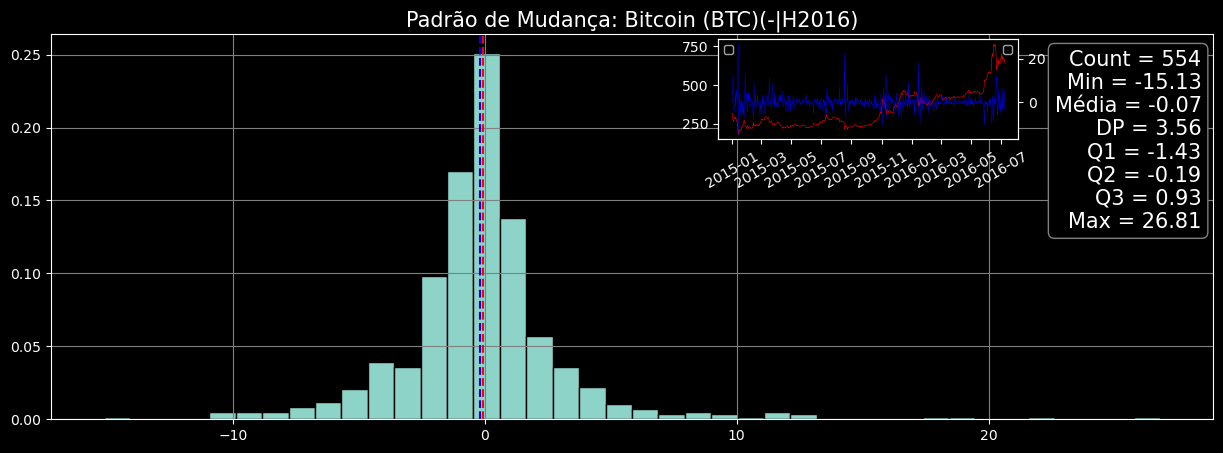

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.44 244.0


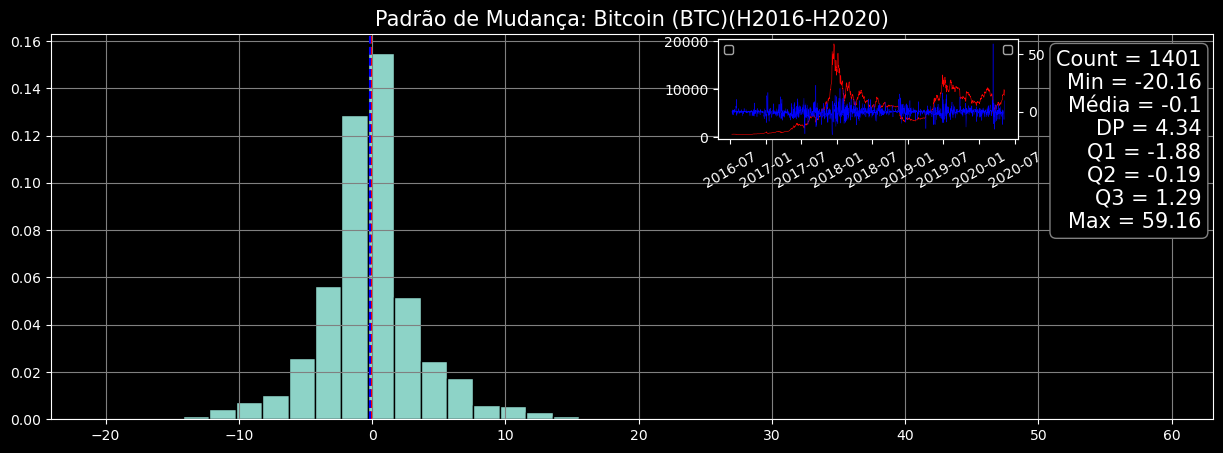

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


29.03 3003.0


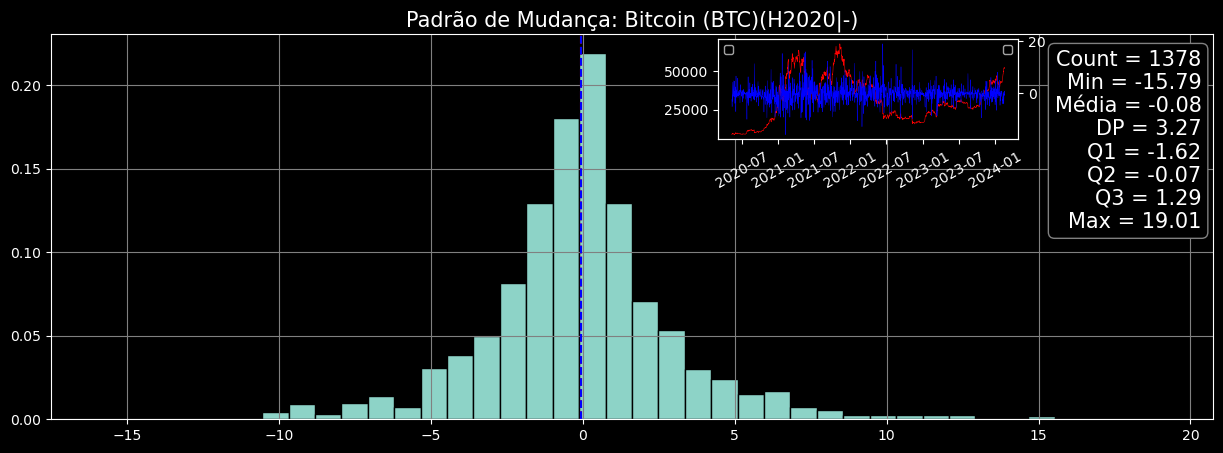

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


6.67 767.0
============================================= BNB =============================================


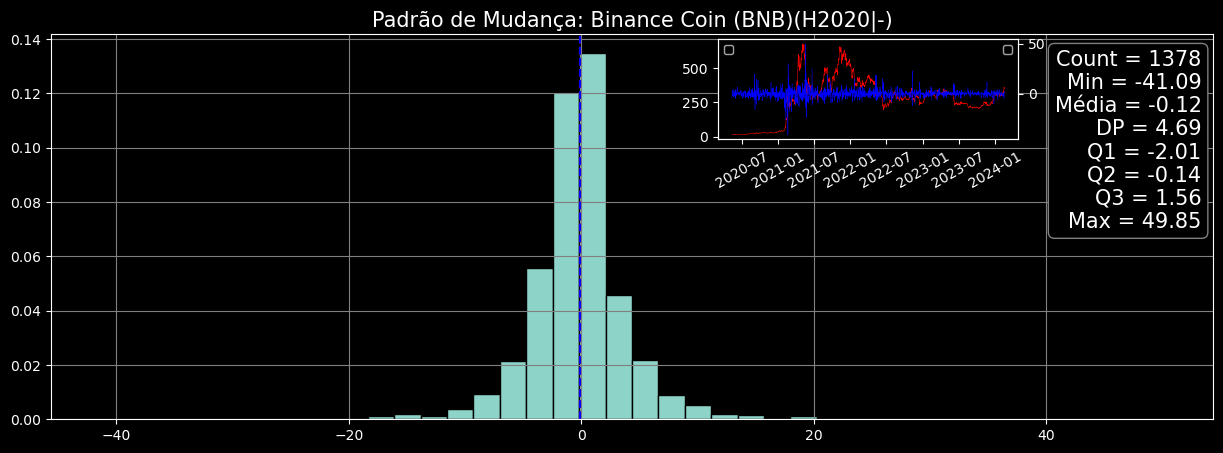

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


41.92 4292.0
============================================= ETH =============================================


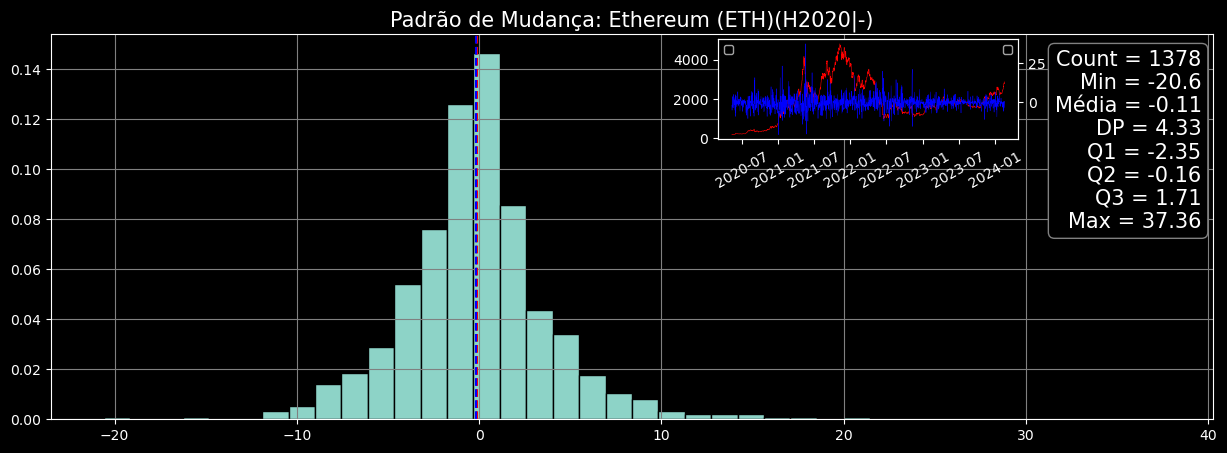

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


24.42 2542.0
============================================= SOL =============================================


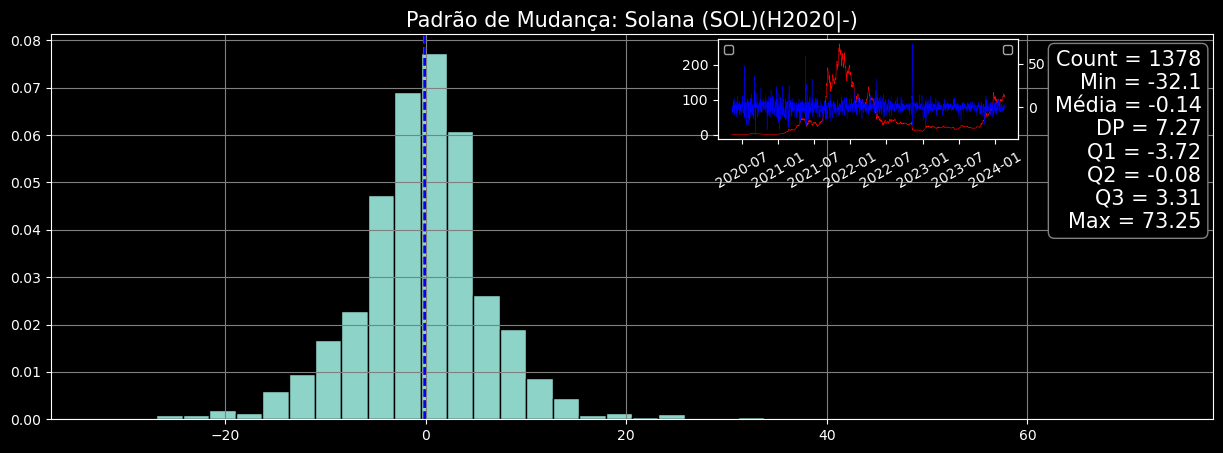

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


479.78 48078.0
============================================= AVAX =============================================


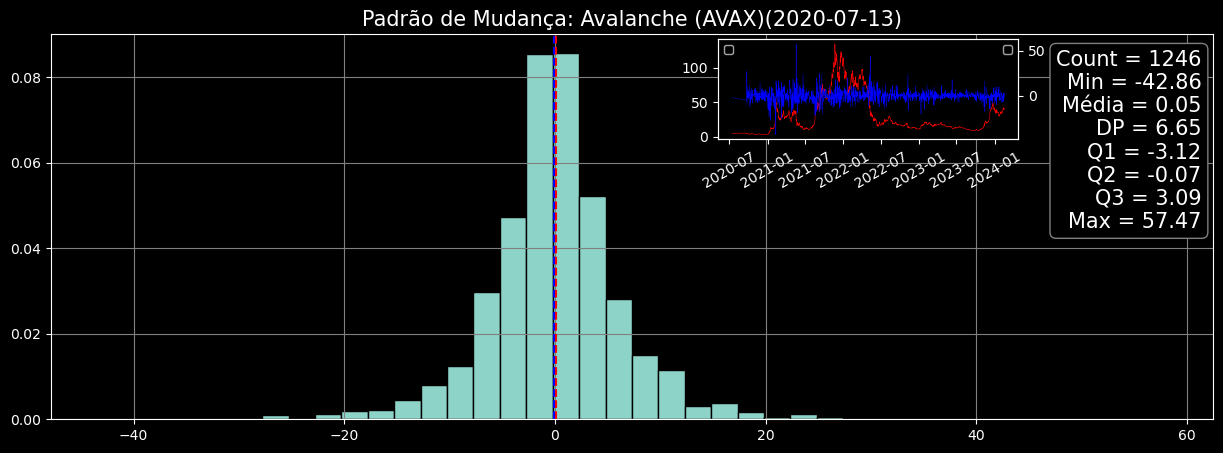

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
26.48 2748.0
============================================= ADA =============================================


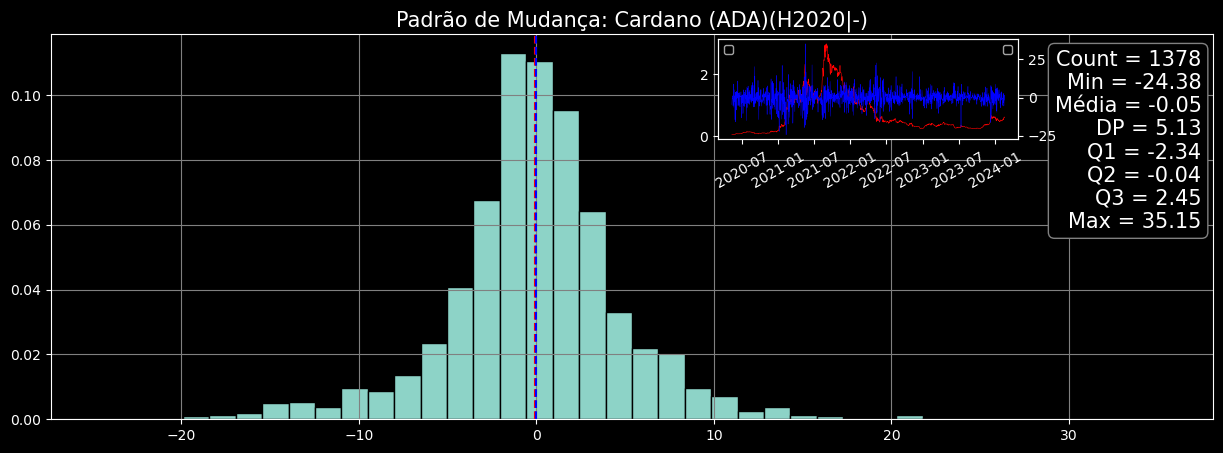

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


57.87 5887.0
============================================= XRP =============================================


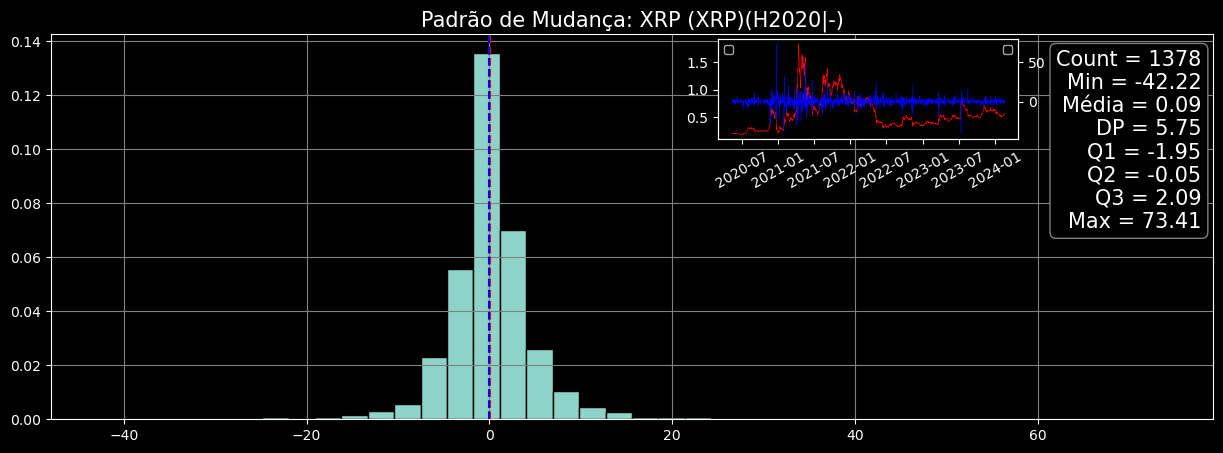

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8.31 931.0
============================================= RNDR =============================================


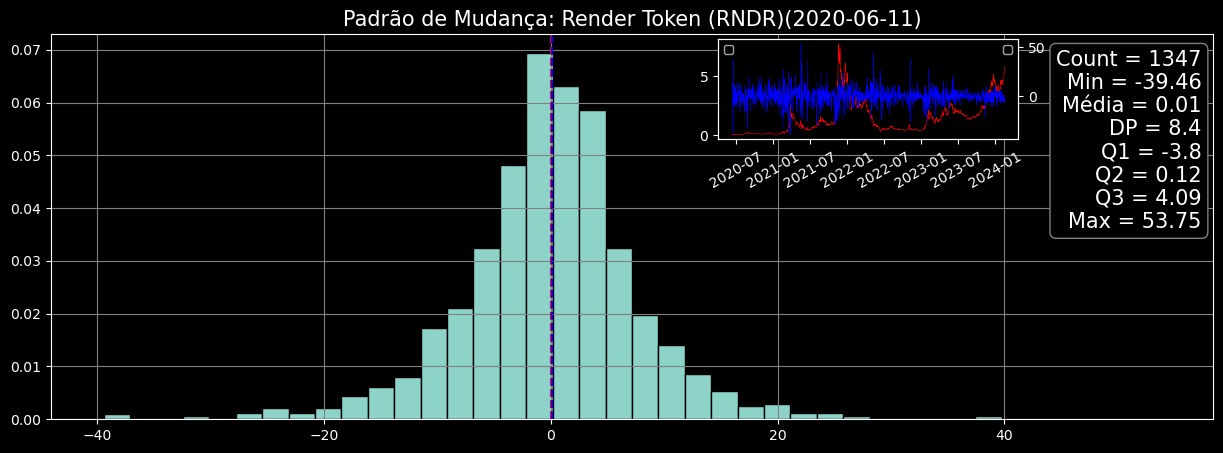

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
138.58 13958.0
============================================= GRT =============================================


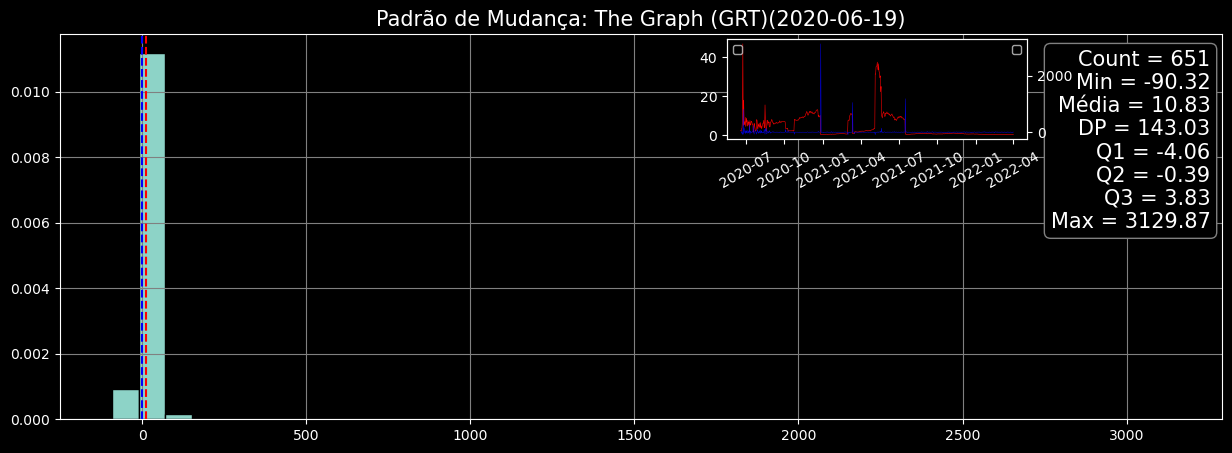

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
17.15 1815.0
============================================= AGIX =============================================


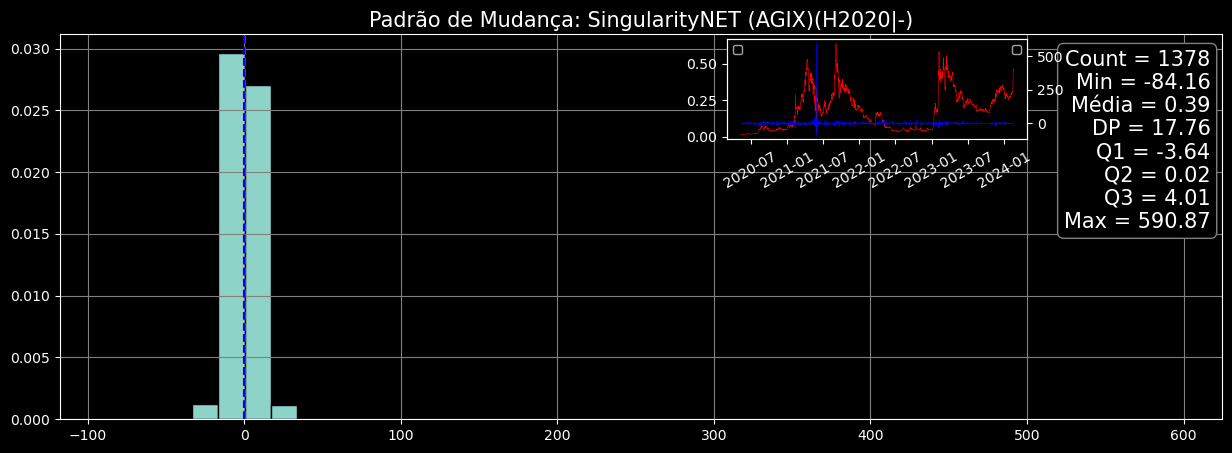

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


48.21 4921.0
============================================= OCEAN =============================================


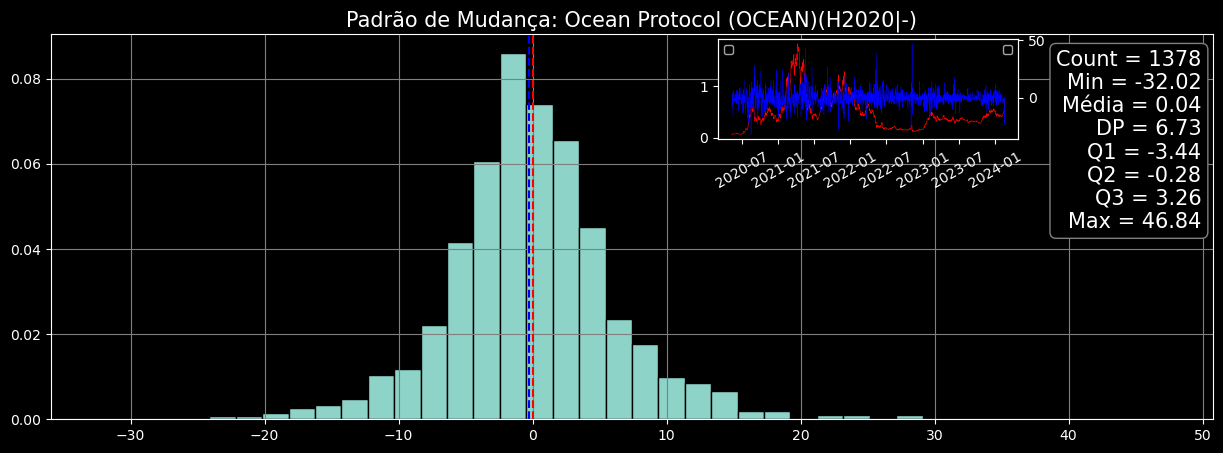

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


28.39 2939.0
============================================= INJ =============================================


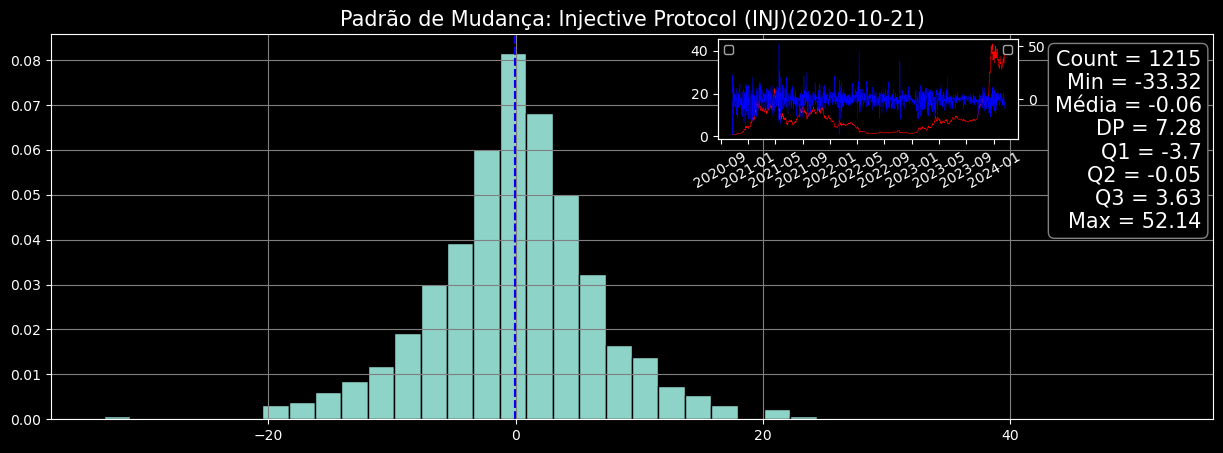

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
54.99 5599.0
============================================= KAS =============================================


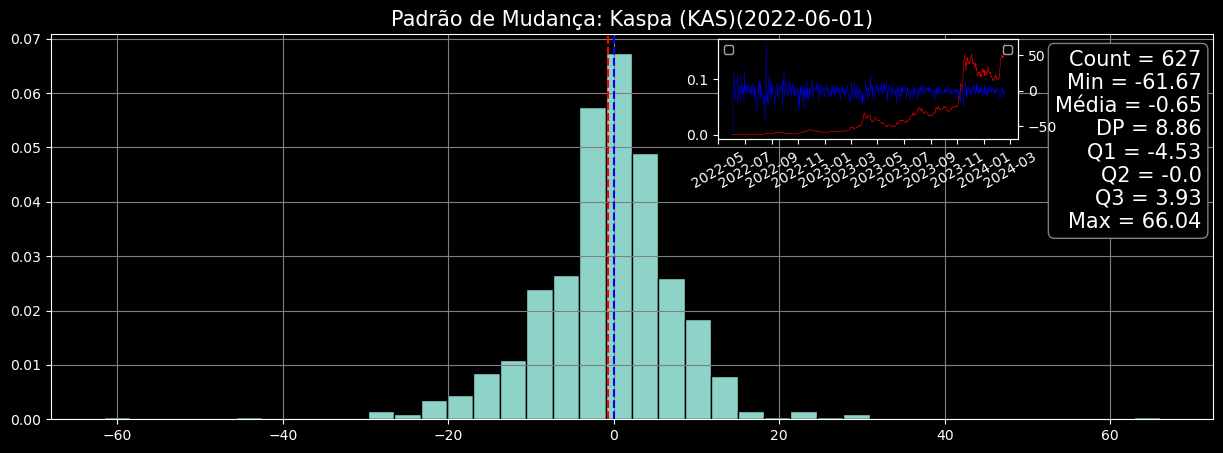

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
890.14 89114.0
============================================= CSPR =============================================


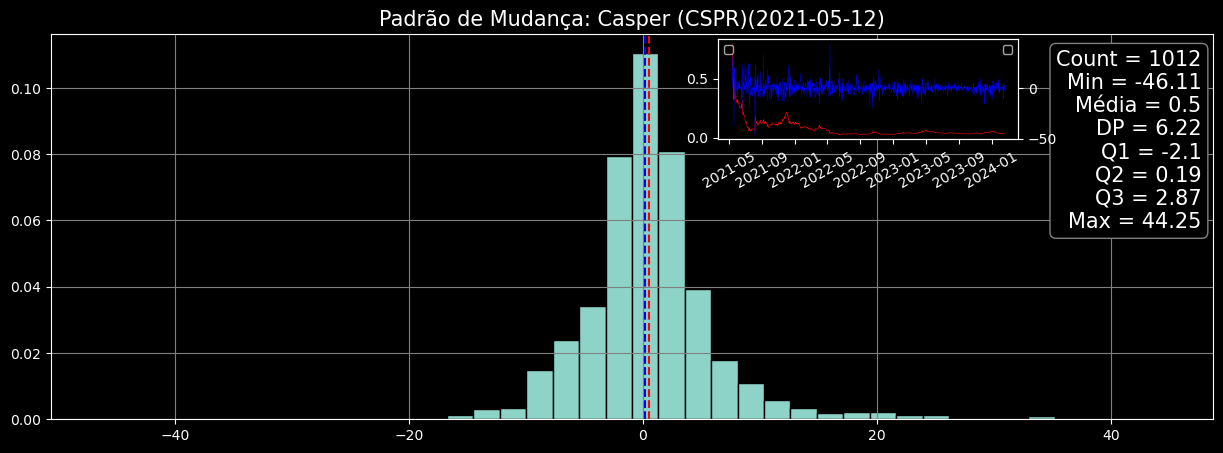

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
0.0 100.0
============================================= PLA =============================================


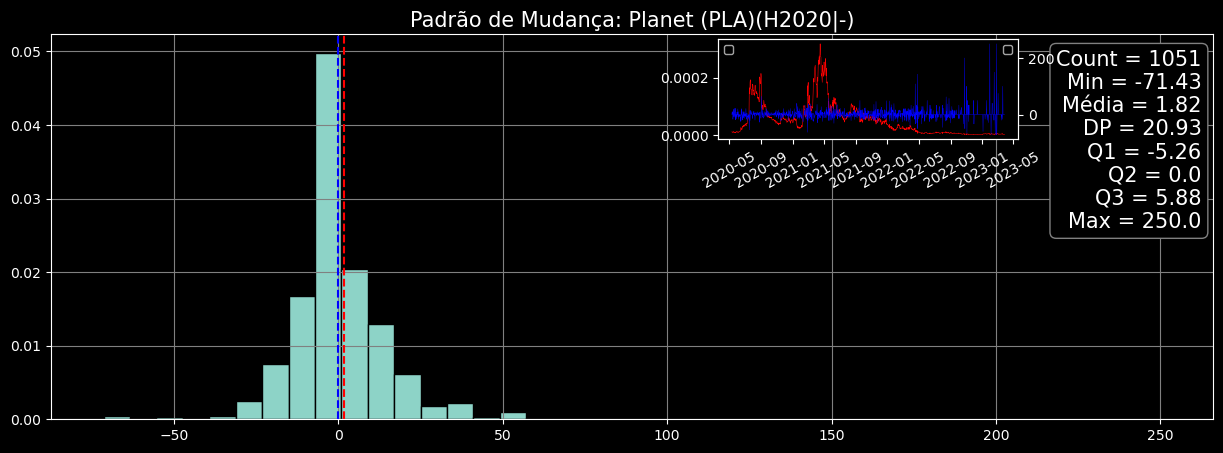

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


25.5 2650.0
============================================= LMWR =============================================


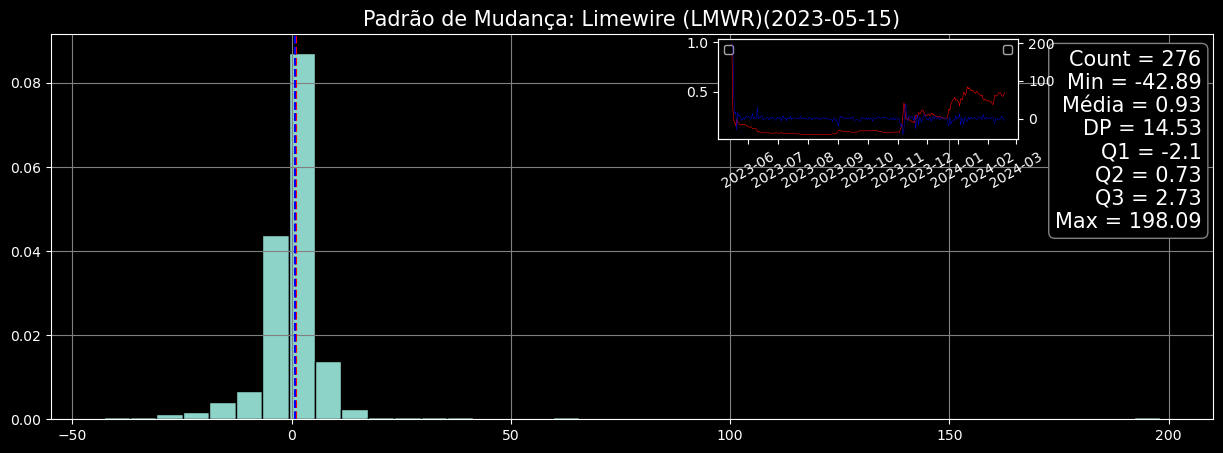

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
0.0 100.0
============================================= INSP =============================================


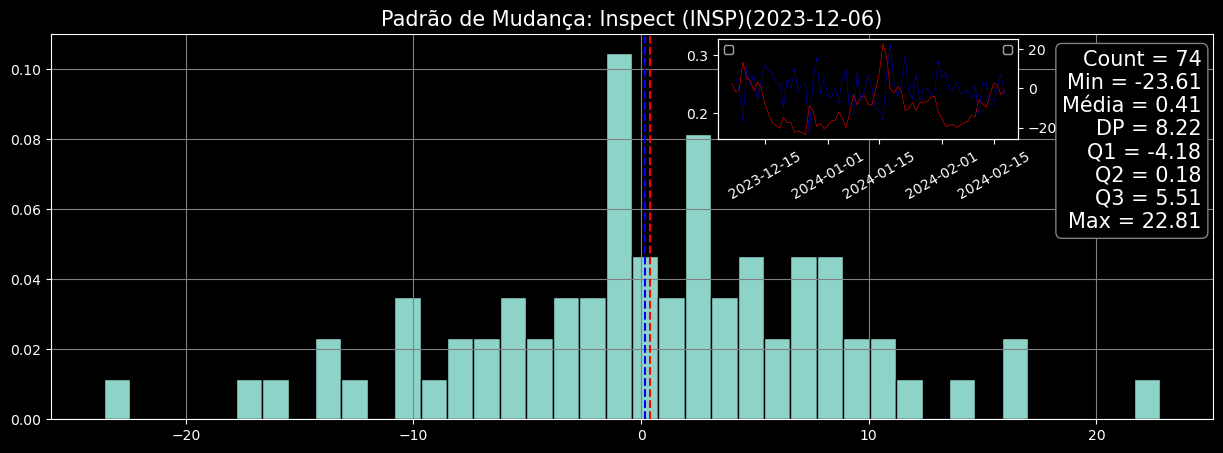

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
0.27 127.0
============================================= BCH =============================================


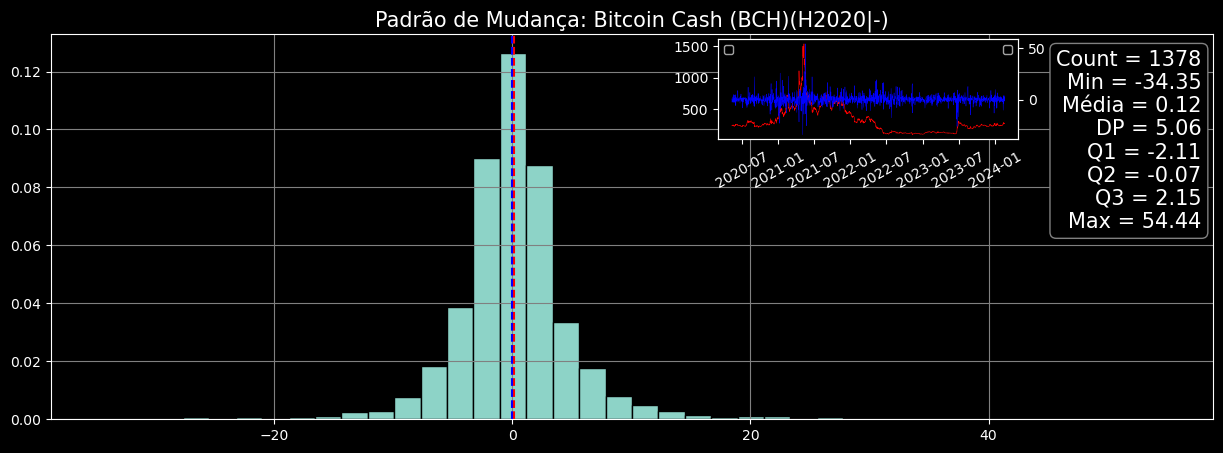

5.62 662.0


In [6]:
investimento = 100

data_halving_2016 = '2016-07-09'
data_halving_2020 = '2020-05-11'


for df, nome in zip(cryptos, cryptos_nome.keys()):
    count = 0
    print("="*45, nome, "="*45)
    if datetime.datetime.strptime(data_halving_2016, '%Y-%m-%d') in df.index:
        
        # Valor de Mudança antes do Halving(2016)
        # Retorno se tivesse comprado no halving e vendido na maxima
        dff = df[df.index < datetime.datetime.strptime(data_halving_2016, '%Y-%m-%d')] #antes da data
        hist_mudanca(dff, cryptos_nome[nome] + " (" + nome + ")" + "(-|H2016)", 'mudança')
        primero_preco = dff['Close'][dff.index[0]]
        maxima_atingida = dff['Close'].max()
        calculo(investimento, dff, primero_preco, maxima_atingida)

        # Valor de Mudança depois do Halving(2016) até o proximo Halving(2020)
        # Retorno se tivesse comprado no halving e vendido na maxima
        dff = df[(df.index > datetime.datetime.strptime(data_halving_2016, '%Y-%m-%d')) &
                 (df.index < datetime.datetime.strptime(data_halving_2020, '%Y-%m-%d'))] #depois e antes(2020)
        hist_mudanca(dff, cryptos_nome[nome] + " (" + nome + ")" + "(H2016-H2020)", 'mudança')
        primero_preco = dff['Close'][dff.index[0]]
        maxima_atingida = dff['Close'].max()
        calculo(investimento, dff, primero_preco, maxima_atingida)
    else:
        count += 1

    if datetime.datetime.strptime(data_halving_2020, '%Y-%m-%d') in df.index:
        
        # Valor de Mudança depois do Halving(2020)
        # Retorno se tivesse comprado no halving e vendido na maxima
        dff = df[df.index > datetime.datetime.strptime(data_halving_2020, '%Y-%m-%d')] #depois e antes(2020)
        hist_mudanca(dff, cryptos_nome[nome] + " (" + nome + ")" + "(H2020|-)", 'mudança')
        primero_preco = dff['Close'][dff.index[0]]
        maxima_atingida = dff['Close'].max()
        calculo(investimento, dff, primero_preco, maxima_atingida)
    else:
        count += 1
    if count == 2:
        hist_mudanca(df, cryptos_nome[nome] + " (" + nome + ")" + "("+str(df.index[0])[:10]+")", 'mudança')
        primero_preco = df['Close'][df.index[0]]
        maxima_atingida = df['Close'].max()
        print("*")
        calculo(investimento, df, primero_preco, maxima_atingida)

In [7]:
#CRIANDO COLUNAS DE MÉDIA MOVÉIS
#Adiciona colunas de médias móveis (SMA e EMA) a um DataFrame de preços de criptomoedas.

def adicionar_medias_moveis(df):
    
    # Médias Móveis Simples (SMA)
    df['SMA_7'] = df['Close'].rolling(window=7).mean()
    df['SMA_25'] = df['Close'].rolling(window=25).mean()
    df['SMA_99'] = df['Close'].rolling(window=99).mean()

    # Médias Móveis Exponenciais (EMA)
    df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
    df['EMA_25'] = df['Close'].ewm(span=25, adjust=False).mean()
    df['EMA_99'] = df['Close'].ewm(span=99, adjust=False).mean()

    return df

for df in cryptos:
    df = adicionar_medias_moveis(df)

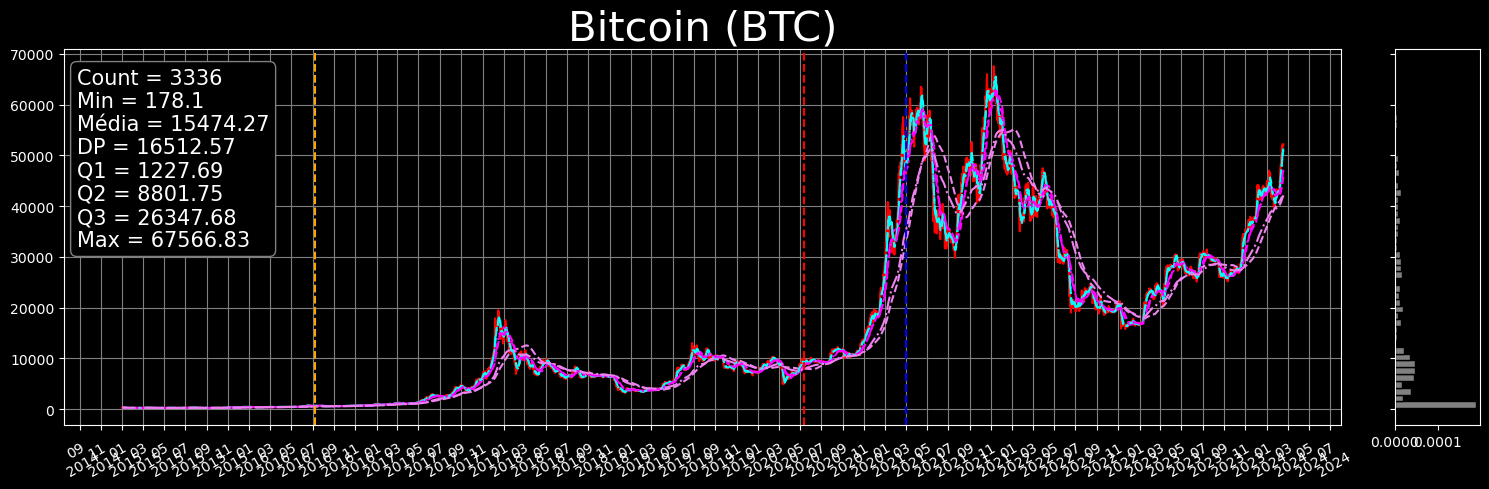

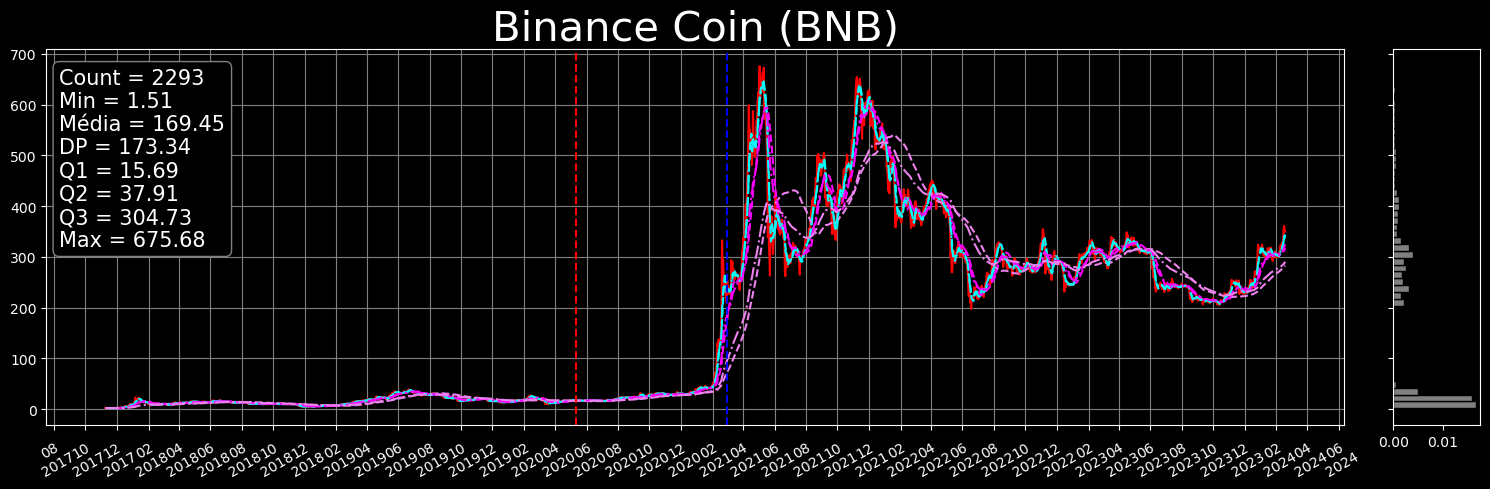

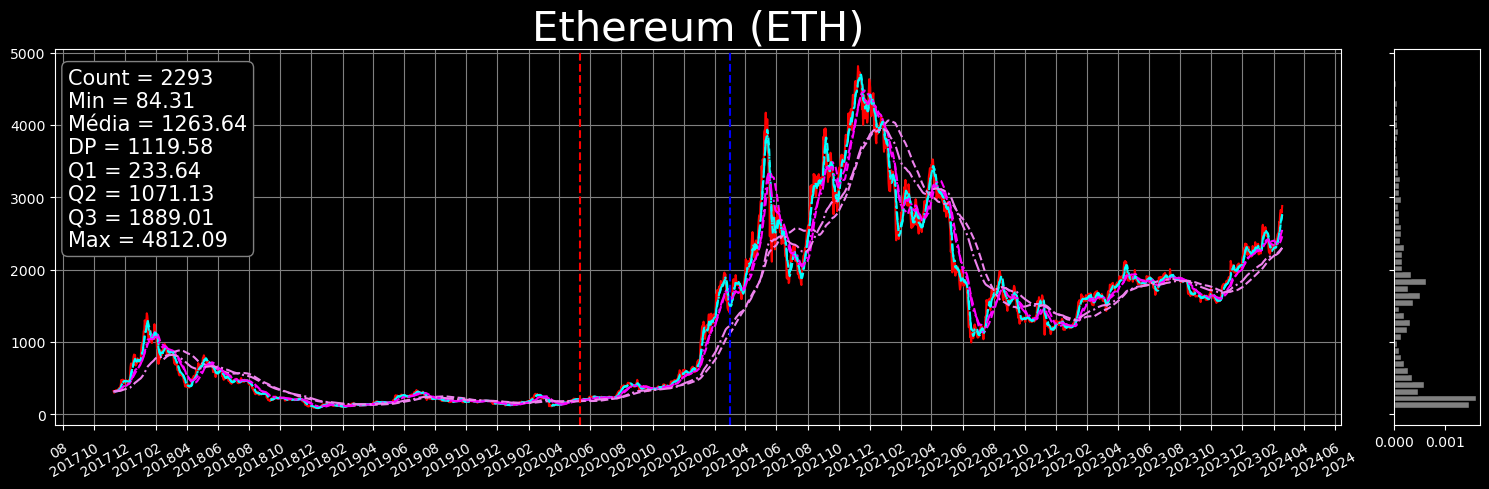

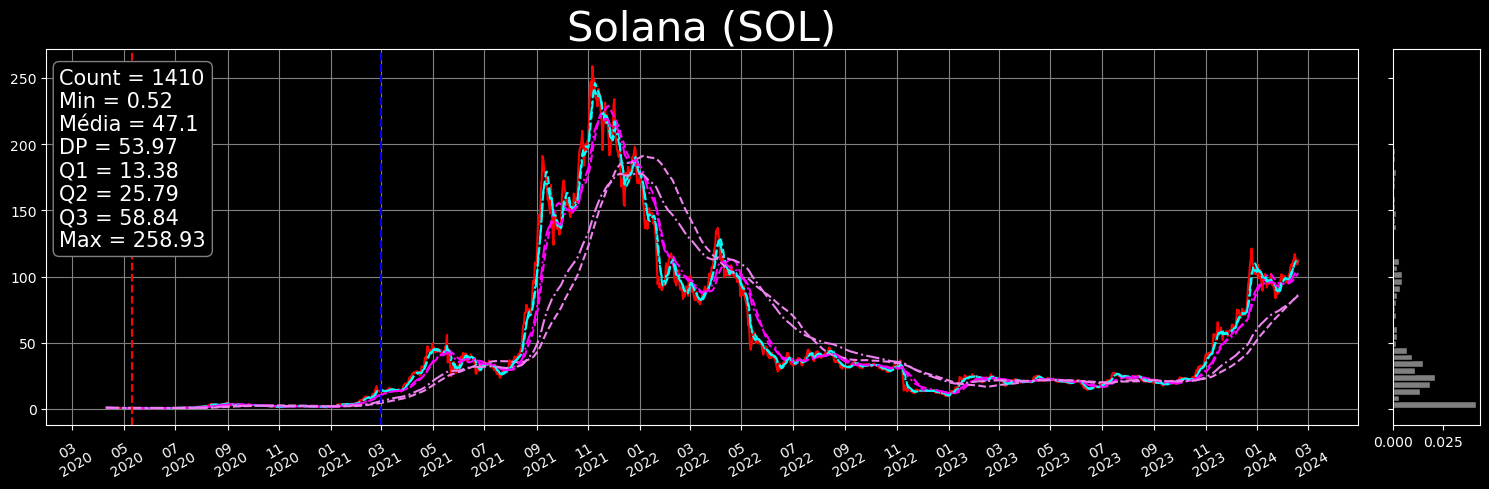

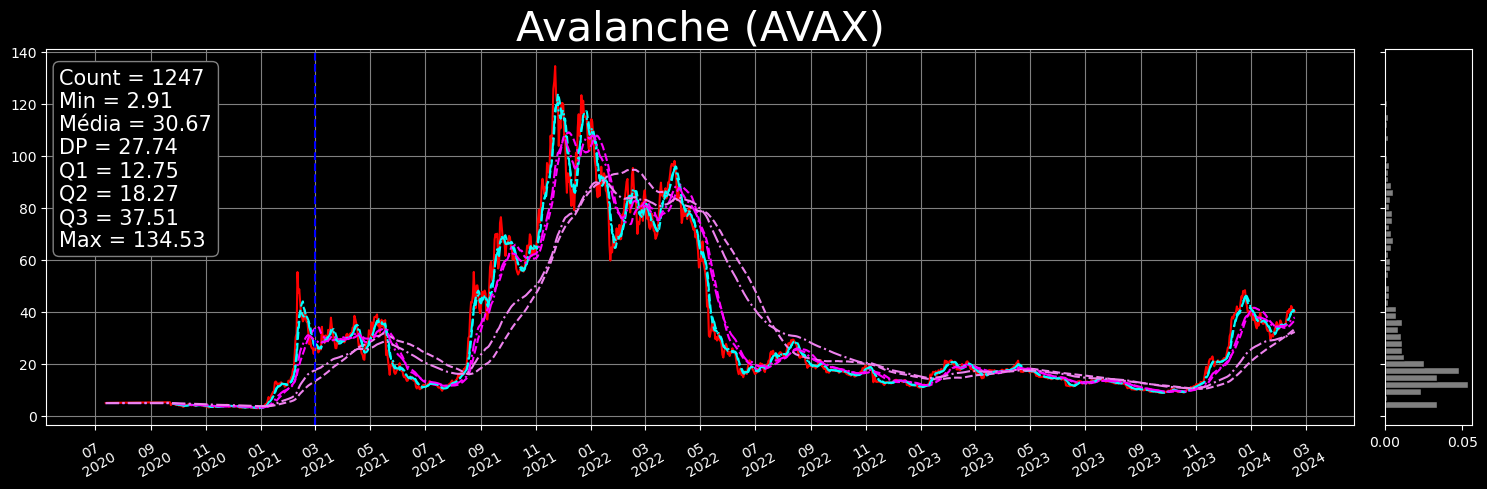

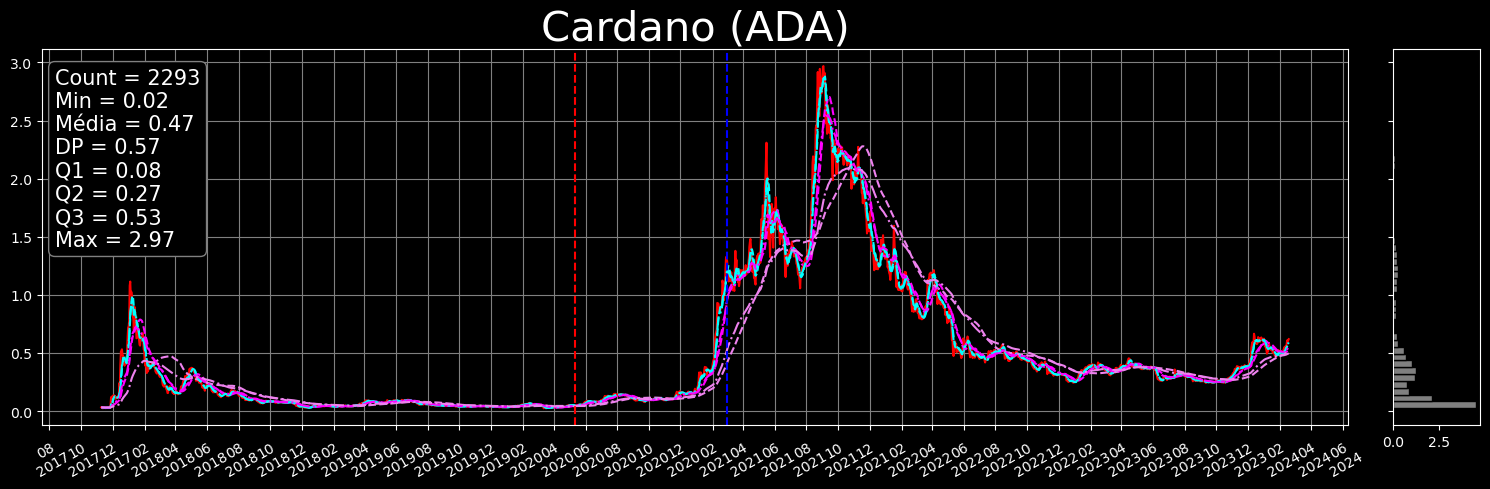

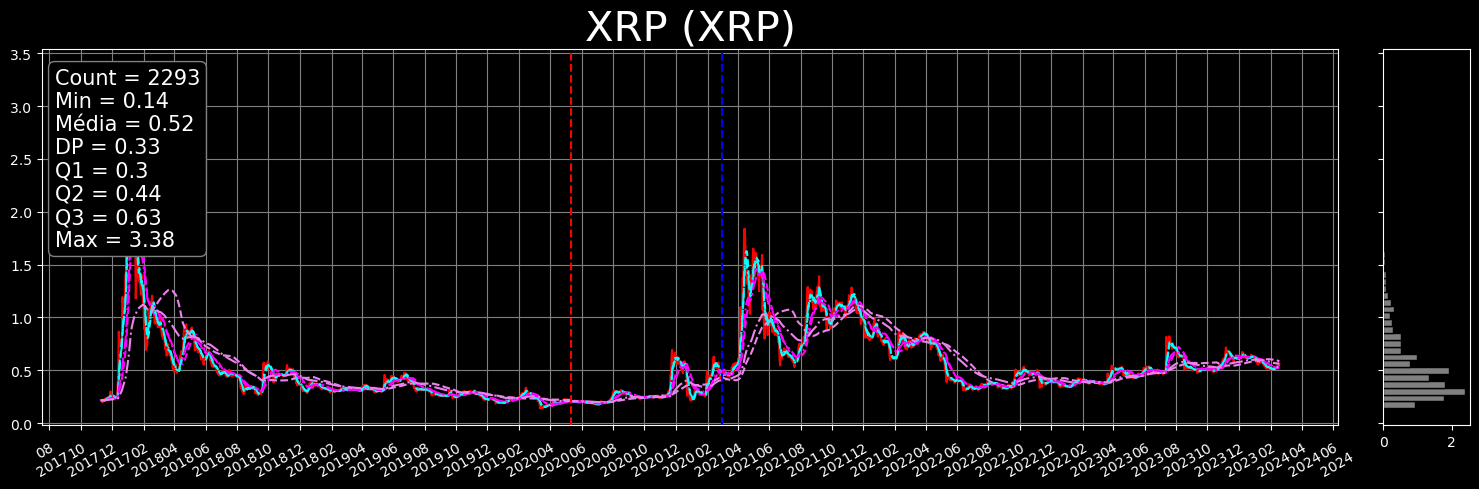

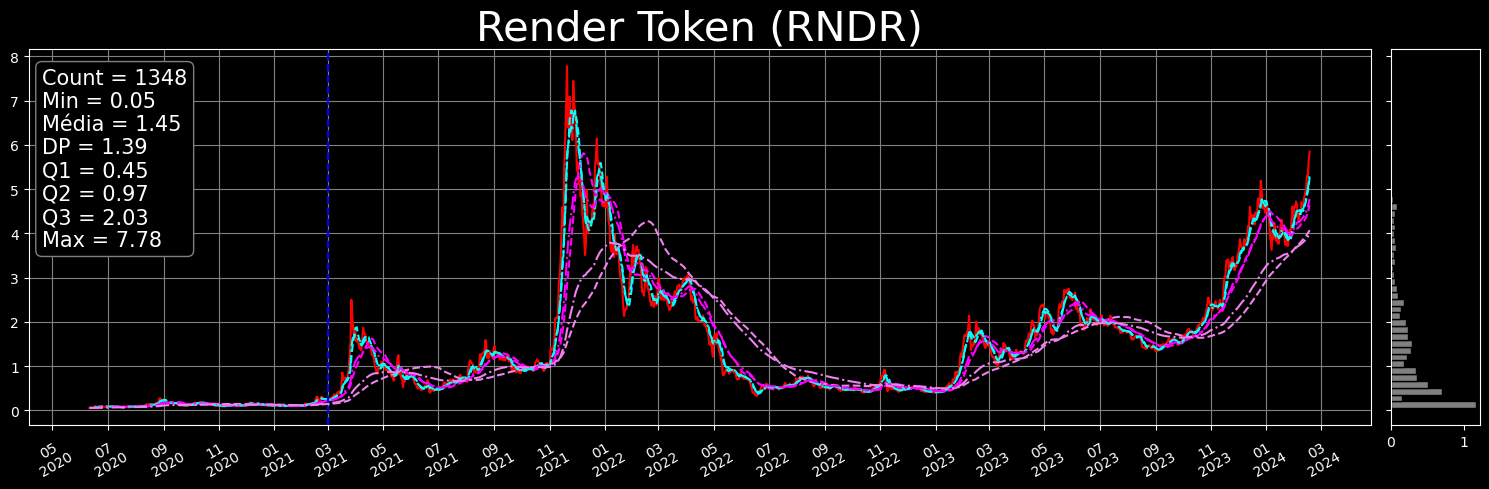

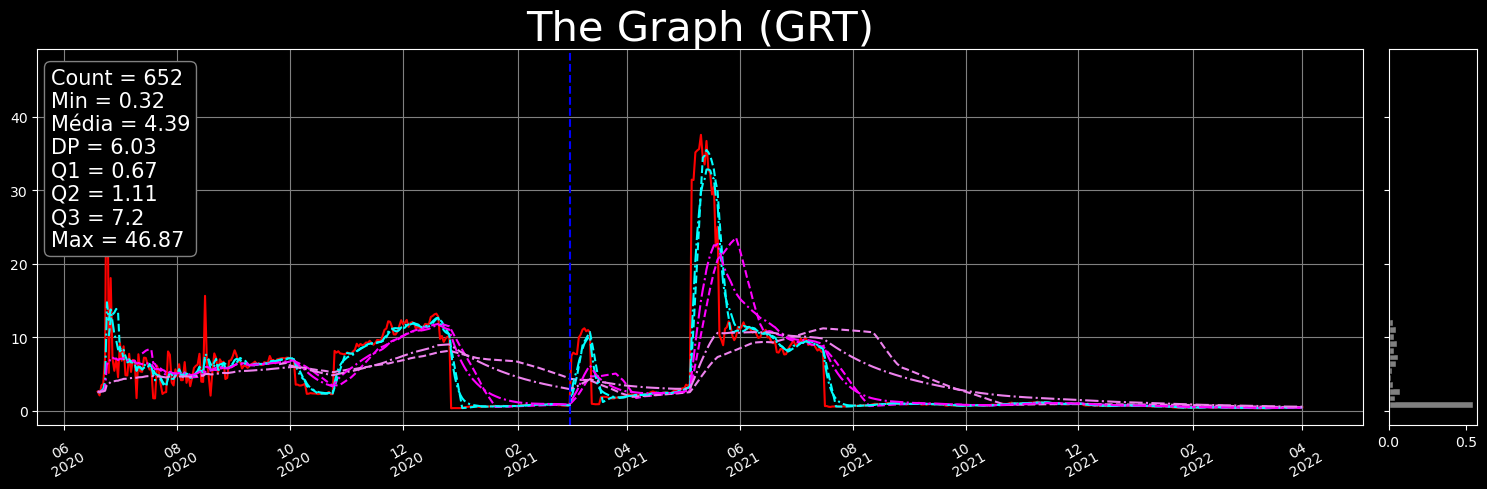

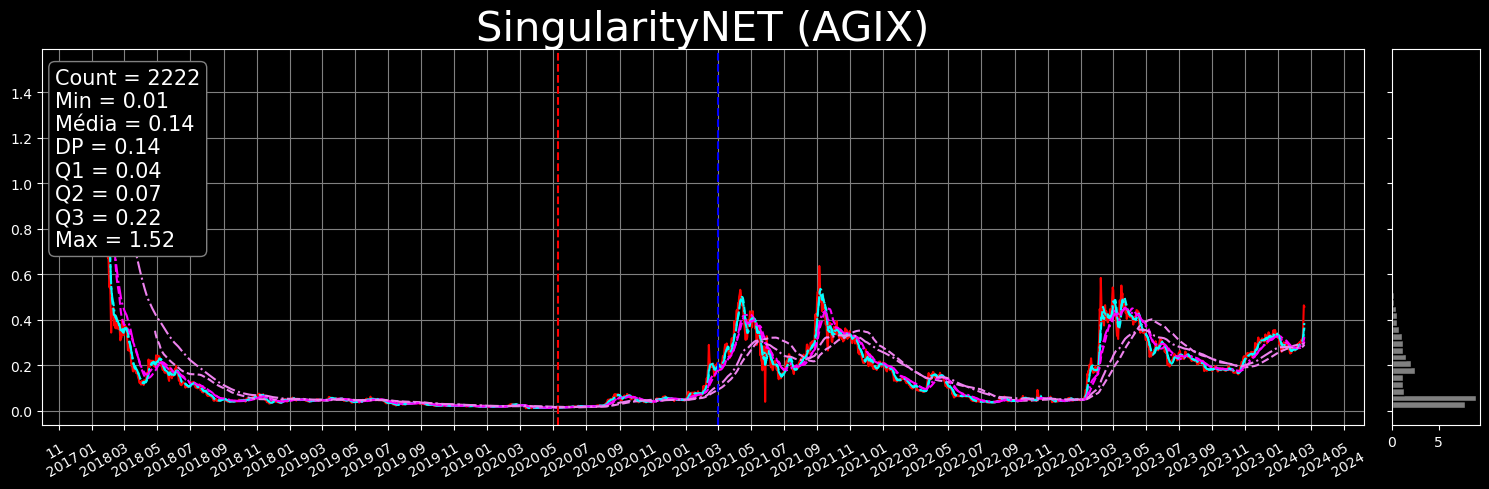

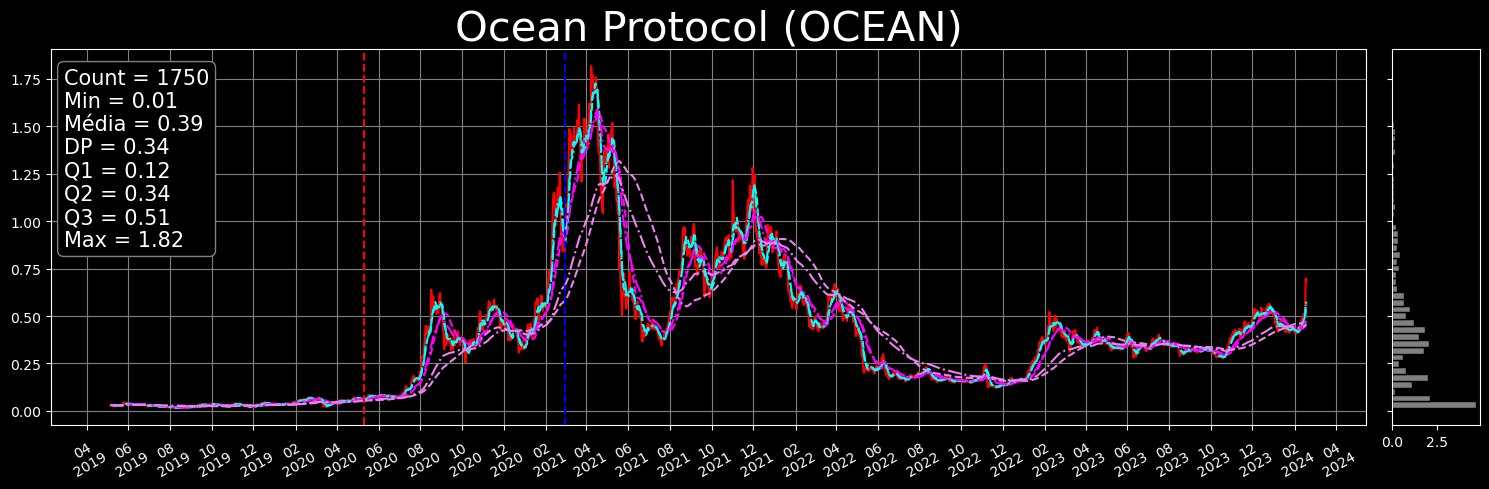

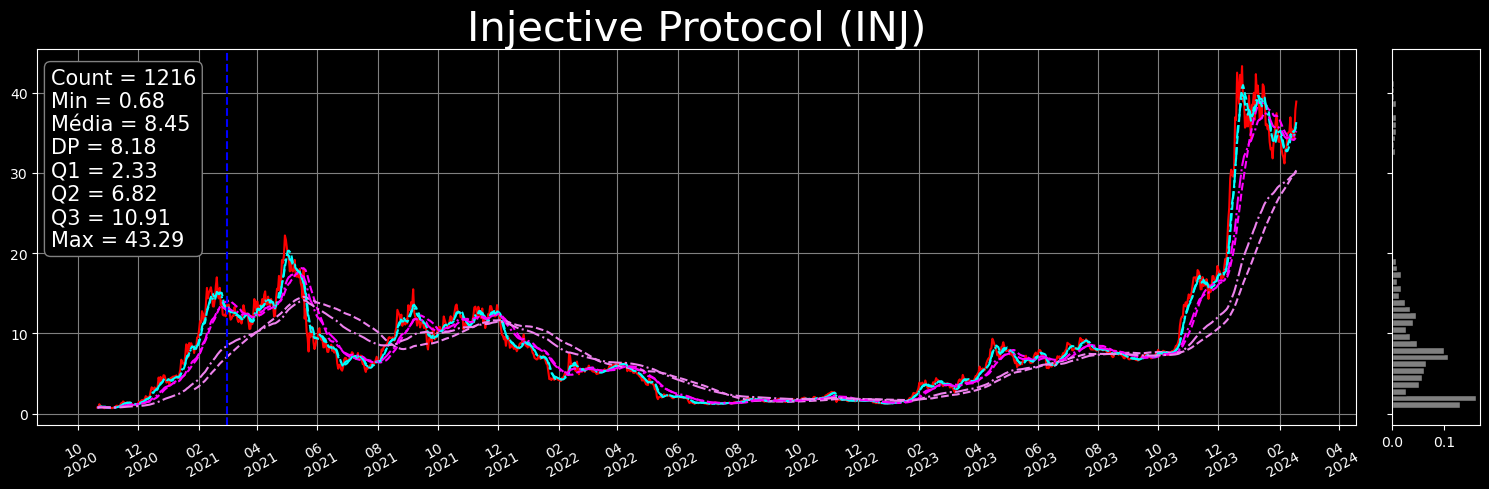

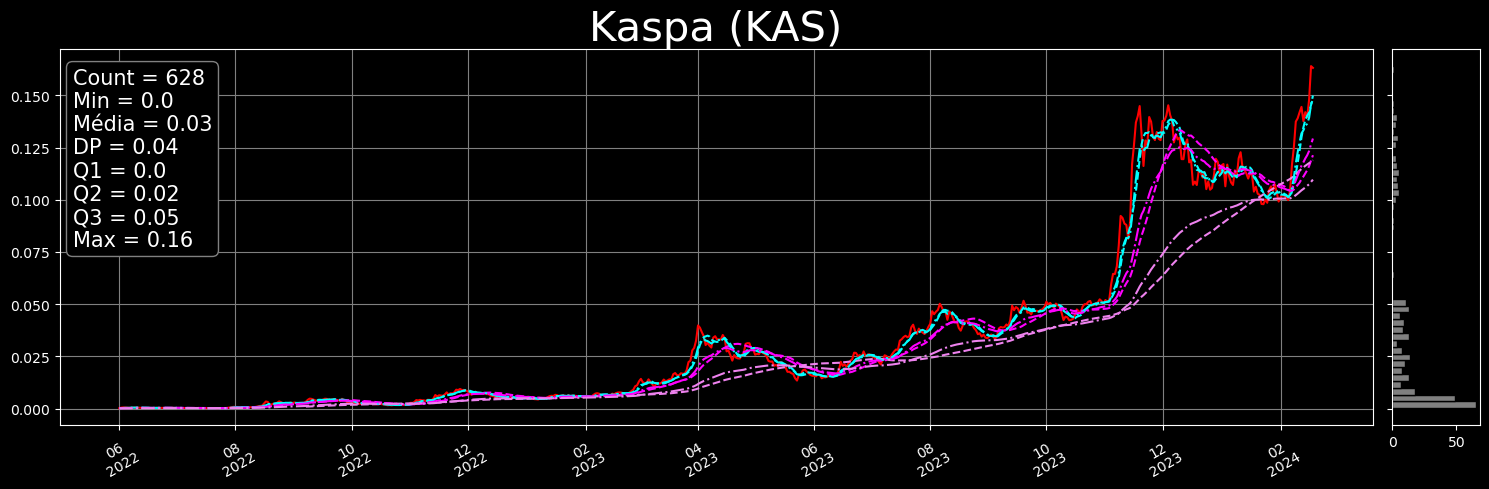

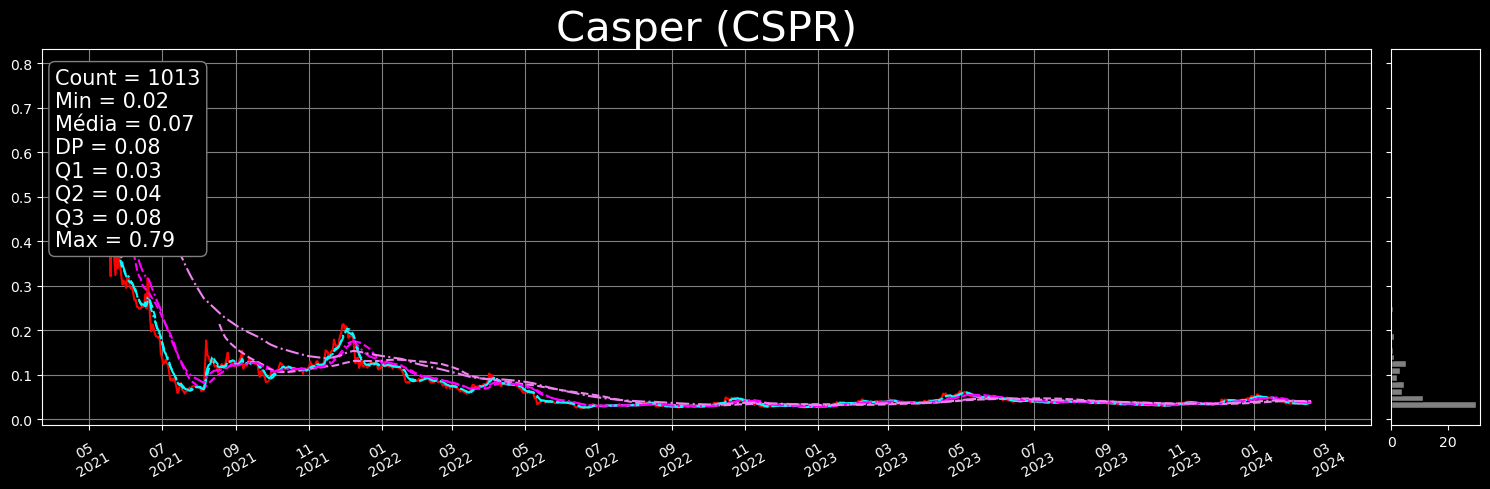

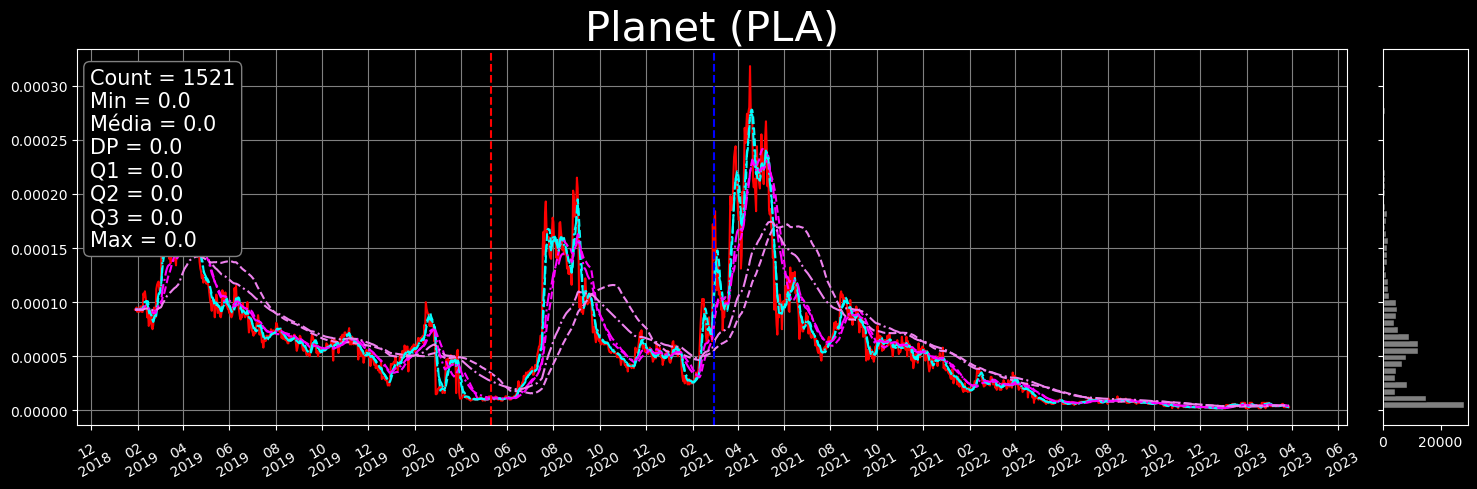

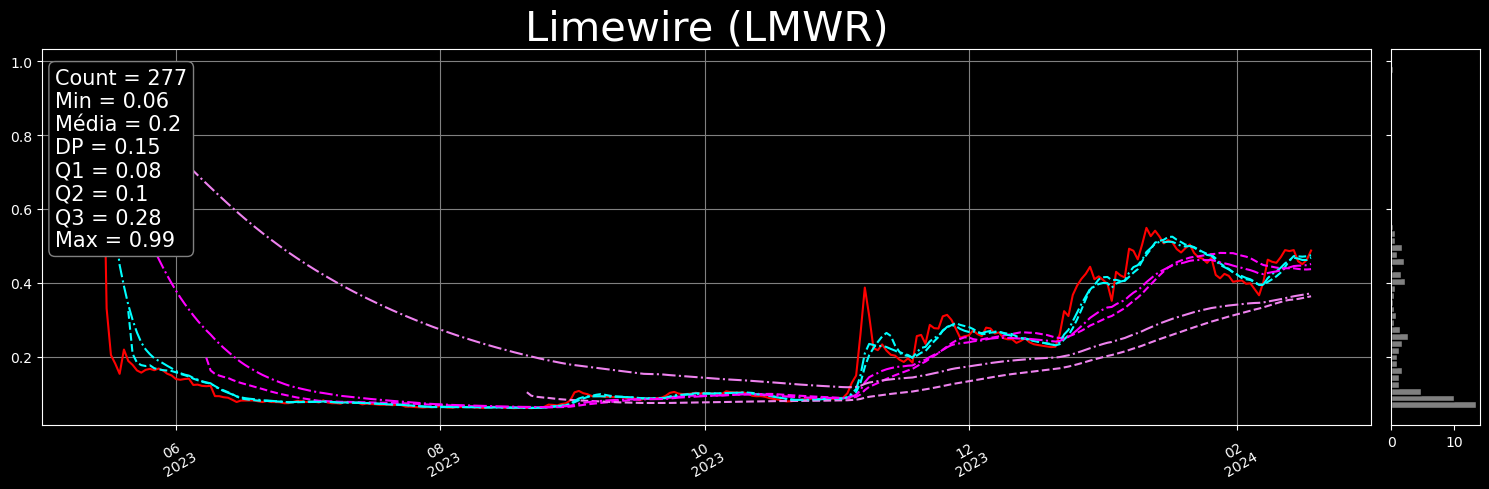

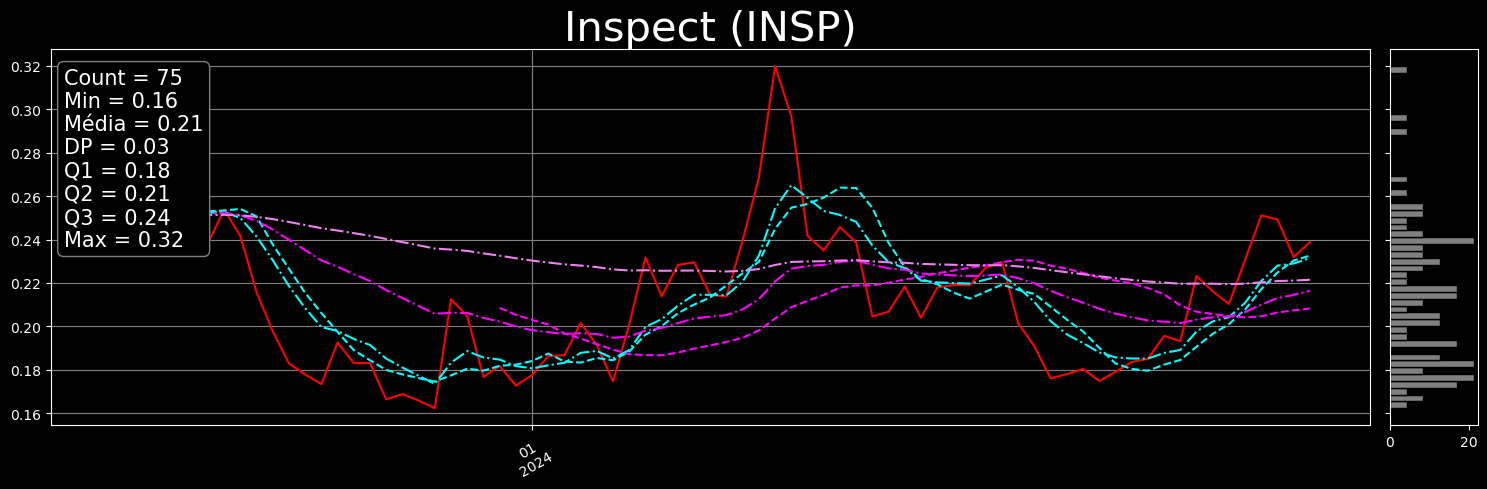

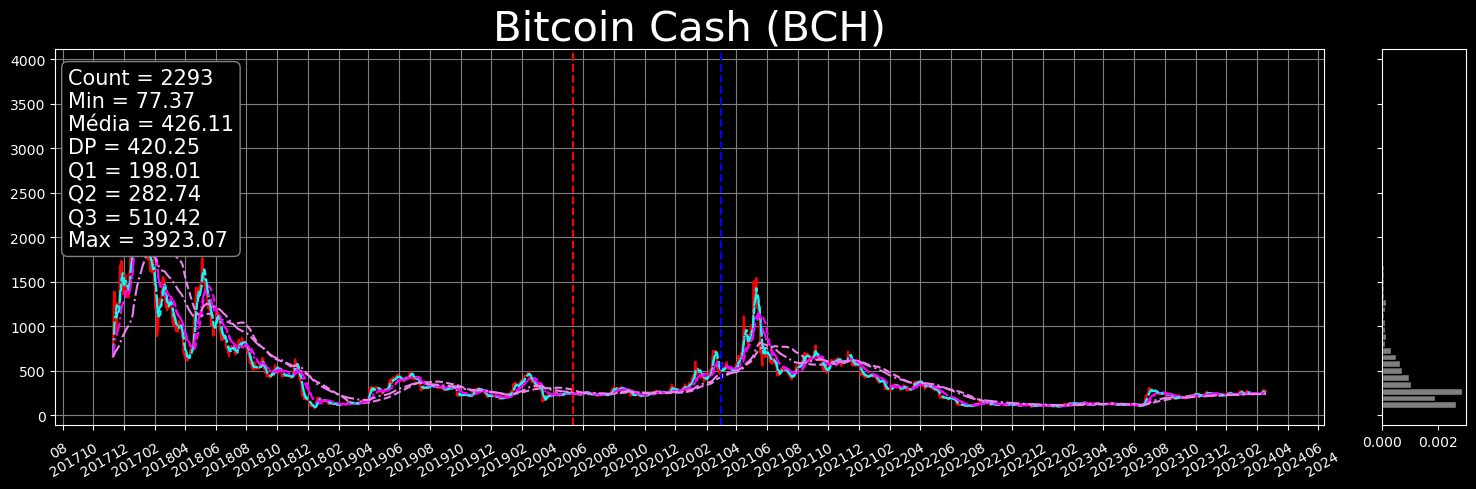

In [8]:
import datetime

def plot_price(dataframe, moeda, line_color='blue'):
    # Criar uma figura e dois subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), 
                                   gridspec_kw={'width_ratios': [15, 1]}, sharey=True)
    
    ax1.plot(dataframe.index, dataframe['Close'], color=line_color)
    ax1.set_title(moeda, fontsize=30)
    
    try:
        # Adicionar linhas para as médias móveis no ax1
        ax1.plot(dataframe.index, dataframe['SMA_7'], color='cyan', linestyle='--', linewidth=1.5)
        ax1.plot(dataframe.index, dataframe['SMA_25'], color='magenta', linestyle='--', linewidth=1.5)
        ax1.plot(dataframe.index, dataframe['SMA_99'], color='violet', linestyle='--', linewidth=1.5)

        ax1.plot(dataframe.index, dataframe['EMA_7'], color='cyan', linestyle='-.', linewidth=1.5)
        ax1.plot(dataframe.index, dataframe['EMA_25'], color='magenta', linestyle='-.', linewidth=1.5)
        ax1.plot(dataframe.index, dataframe['EMA_99'], color='violet', linestyle='-.', linewidth=1.5)
    except KeyError:
        # Caso as colunas das médias móveis não existam, apenas continua
        pass
    
    #######################################################################################
    #HALVINGS#############################################
    halving_date2016 = datetime.datetime.strptime('2016-07-09', '%Y-%m-%d')
    if dataframe.index.min() <= halving_date2016:
        ax1.axvline(x=halving_date2016, color='orange', linestyle='--', label='Halving')
    
    halving_date2020 = datetime.datetime.strptime('2020-05-11', '%Y-%m-%d')
    if dataframe.index.min() <= halving_date2020:
        ax1.axvline(x=halving_date2020, color='red', linestyle='--', label='Halving')
    
    #OUTRAS DATAS#############################################
    crescimento_pos_halving2020 = datetime.datetime.strptime('2021-03-01', '%Y-%m-%d')
    if dataframe.index.min() <= crescimento_pos_halving2020:
        ax1.axvline(x=crescimento_pos_halving2020, color='blue', linestyle='--', label='Halving')
    
    #######################################################################################

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m\n%Y')) # Formato do ano e mês
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # Intervalo de 2 meses
    ax1.grid(True, color='gray')
    ax1.tick_params(axis='x', rotation=30)
    
    # Plotar o histograma no ax2
    ax2.hist(dataframe['Close'], bins=50, orientation='horizontal', color='gray',
             edgecolor='black', density=True)

    # Adicionar legenda personalizada
    texto_count = 'Count = ' + str(round(len(df.dropna(subset=['Close'])), 2))
    texto_media = 'Média = '+ str(round(df['Close'].mean(), 2))
    texto_dp = 'DP = '+ str(round(df['Close'].std(), 2))
    texto_min = 'Min = '+ str(round(df['Close'].min(), 2))
    texto_Q1 = 'Q1 = ' + str(round(df['Close'].quantile(0.25), 2))
    texto_mediana = 'Q2 = '+ str(round(df['Close'].median(), 2))
    texto_Q3 = 'Q3 = ' + str(round(df['Close'].quantile(0.75), 2))
    texto_max = 'Max = '+ str(round(df['Close'].max(), 2))
    texto_legenda = '\n'.join([texto_count, 
                               texto_min,
                               texto_media, texto_dp, 
                               texto_Q1, texto_mediana, texto_Q3,
                               texto_max])
    
    ax1.text(0.01, 0.95, texto_legenda, ha='left', va='top', transform=ax1.transAxes,
             bbox=dict(facecolor='black', edgecolor='gray', boxstyle='round'),
             fontsize=15)

    plt.tight_layout()
    plt.show()


for df, nome in zip(cryptos, cryptos_nome.keys()):
    plot_price(df, moeda= cryptos_nome[nome] + " (" + nome + ")", line_color='red')


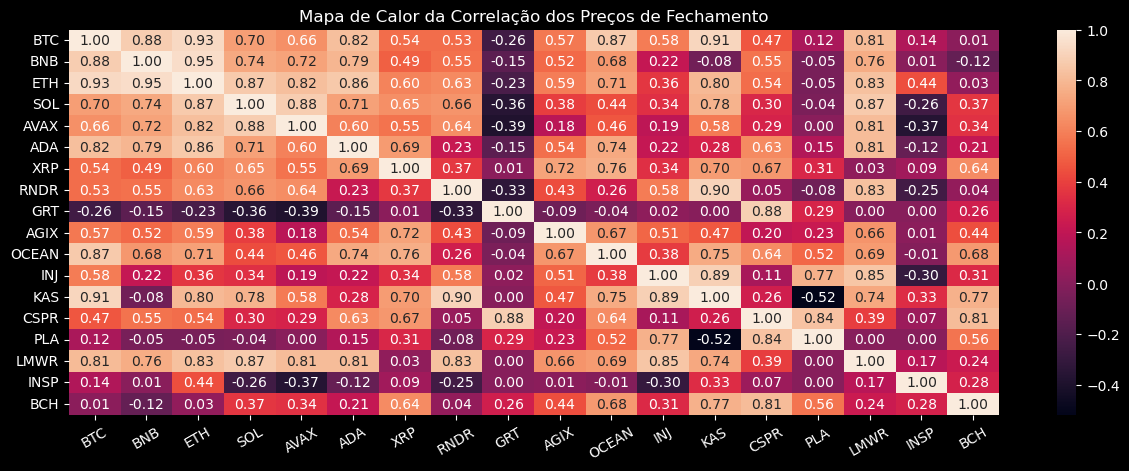

In [9]:
# FUNÇÃO DE CORRELAÇÃO ENTRE DOIS PREÇOS
# Correlação entre os preços de fechamento dos dois DataFrames
def calcular_correlacao(df1, df2):
    close1 = df1['Close']
    close2 = df2['Close']

    close1_aligned, close2_aligned = close1.align(close2, join='inner') # Alinhar os índices dos DataFrames
    correlacao = close1_aligned.corr(close2_aligned) # Calcular e retornar a correlação
    return correlacao

################################################################################################
# MEDINDO O GRAU DE CORRELAÇÃO ENTRE AS MOEDAS

correlation_table = pd.DataFrame(index=cryptos_nome.keys(), columns=cryptos_nome.keys())
# Calcular a correlação entre cada par
for i, df1 in enumerate(cryptos):
    for j, df2 in enumerate(cryptos):
        correlation_table.iloc[i, j] = calcular_correlacao(df1, df2)
        
correlation_table = correlation_table.fillna(0)

################################################################################################

# REPRESENTAÇÃO GRAFICA 
# Usar Seaborn para criar o mapa de calor
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_table.astype(float), annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação dos Preços de Fechamento')
plt.show()

Correlações Mais Altas:


Ativo 1 Ativo 2  Correlação
0      BTC     BNB    0.878256
1      BTC     ETH    0.925201
2      BTC     ADA    0.823448
3      BTC   OCEAN    0.869158
4      BTC     KAS    0.913208
5      BTC    LMWR    0.807407
6      BNB     ETH    0.946556
7      ETH     SOL    0.865730
8      ETH    AVAX    0.823995
9      ETH     ADA    0.858775
10     ETH     KAS    0.803365
11     ETH    LMWR    0.830214
12     SOL    AVAX    0.880901
13     SOL    LMWR    0.866457
14    AVAX    LMWR    0.813969
15     ADA    LMWR    0.813641
16    RNDR     KAS    0.903888
17    RNDR    LMWR    0.828598
18     GRT    CSPR    0.882863
19     INJ     KAS    0.892965
20     INJ    LMWR    0.849457
21    CSPR     PLA    0.838860
22    CSPR     BCH    0.814525

Quantidade de Correlações por Moeda:


Despresiveis  Moderadas  Altas
Ativo                                
ETH              10         10     14
LMWR             12          8     14
BTC              10         12     12
KAS              12         14      8
ADA              14         14      6
SOL              16         12      6
AVAX             16         12      6
CSPR             18         10      6
BNB              14         16      4
RNDR             18         12      4
INJ              22          8      4
OCEAN            12         20      2
PLA              24          8      2
BCH              24          8      2
GRT              32          0      2
XRP              14         20      0
AGIX             18         16      0
INSP             34          0      0

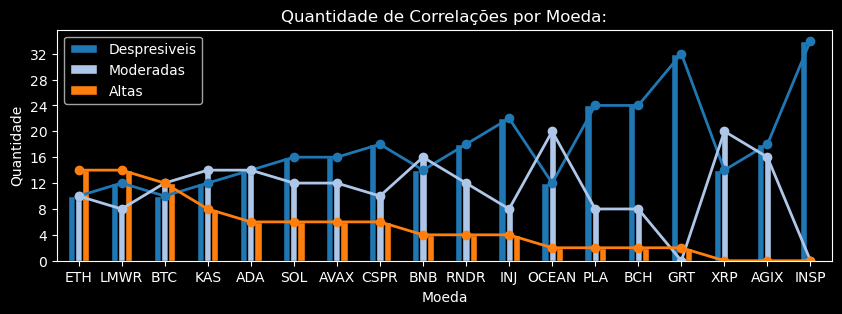

In [10]:
#######################################################################################
# Encontrando pares com correlação maior que 0.8 sem duplicatas
pares_correlacao_alta = []
pares_vistos = set()

for coluna in correlation_table.columns:
    for indice, valor in correlation_table[coluna].items():
        if valor >= 0.8 and valor < 1.0:  # Exclui a correlação perfeita de 1.0
            # Cria uma tupla ordenada para o par, garantindo consistência na ordem
            par_ordenado = tuple(sorted([indice, coluna]))
            
            # Verifica se o par já foi visto
            if par_ordenado not in pares_vistos:
                if indice != coluna:
                    pares_vistos.add(par_ordenado)
                    pares_correlacao_alta.append((coluna, indice, valor))

df_pares_correlacao_alta = pd.DataFrame(pares_correlacao_alta, columns=["Ativo 1", "Ativo 2", "Correlação"])
print("Correlações Mais Altas:")
display(df_pares_correlacao_alta)

#######################################################################################

# Inicializando dicionários para contar os tipos de correlação para cada ativo
contagem_depressiva = {}
contagem_moderada = {}
contagem_alta = {}

for coluna in correlation_table.columns:
    for indice, valor in correlation_table[coluna].items():
        # Ignorando a correlação do ativo com ele mesmo
        if indice != coluna:
            # Contagem de correlações despresiveis
            if -0.5 < valor < 0.5:
                contagem_depressiva[indice] = contagem_depressiva.get(indice, 0) + 1
                contagem_depressiva[coluna] = contagem_depressiva.get(coluna, 0) + 1
            # Contagem de correlações moderadas
            elif 0.5 <= valor < 0.8 or -0.8 < valor <= -0.5:
                contagem_moderada[indice] = contagem_moderada.get(indice, 0) + 1
                contagem_moderada[coluna] = contagem_moderada.get(coluna, 0) + 1
            # Contagem de correlações altas
            if valor != 1:
                if valor >= 0.8 or valor <= -0.8:
                    contagem_alta[indice] = contagem_alta.get(indice, 0) + 1
                    contagem_alta[coluna] = contagem_alta.get(coluna, 0) + 1

df_contagem_depressiva = pd.DataFrame(list(contagem_depressiva.items()), columns=["Ativo", "Despresiveis"])
df_contagem_moderada = pd.DataFrame(list(contagem_moderada.items()), columns=["Ativo", "Moderadas"])
df_contagem_alta = pd.DataFrame(list(contagem_alta.items()), columns=["Ativo", "Altas"])
df_contagens = df_contagem_depressiva.merge(df_contagem_moderada, on="Ativo", how="outer").merge(df_contagem_alta, on="Ativo", how="outer").fillna(0)
for coluna in ['Despresiveis','Moderadas','Altas']: df_contagens[coluna] = df_contagens[coluna].astype('int')
df_contagens = df_contagens.sort_values(['Altas', 'Despresiveis'], ascending=[False, True]).reset_index(drop=True)
df_contagens.set_index('Ativo', inplace=True)

print('Quantidade de Correlações por Moeda:')
display(df_contagens)

#######################################################################################
# CRIANDO GRAFICO

# Obtendo o mapa de cores de forma atualizada
from matplotlib import colormaps
from matplotlib.ticker import MaxNLocator
mapa_cores = colormaps.get_cmap('tab20')

# Adicionando o gráfico de barras
ax = df_contagens.plot(kind='bar', figsize=(10, 3), 
                  color=[mapa_cores.colors[i] for i in range(len(df_contagens.columns))], 
                  edgecolor='black')

# Adicionando o gráfico de linha
for i, coluna in enumerate(df_contagens.columns):
    ax.plot(df_contagens.index, df_contagens[coluna], color=mapa_cores.colors[i], marker='o', linestyle='-', linewidth=2)

plt.xticks(rotation=0)
plt.xlabel('Moeda')
plt.ylabel('Quantidade')
plt.title('Quantidade de Correlações por Moeda:')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [11]:
# ANALISANDO OS MESMOS DADOS LADO A LADO
def norm_pad(df):
    coluna = 'Close'
    df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()
    df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

for i in cryptos:
    norm_pad(i)

#######################################################################################    

def plot_price_joints(dataframe, moeda, line_color='blue'):
    plt.plot(dataframe.index, dataframe['Close_normalizada'], label=moeda, color=line_color)  # Aplica a cor da linha
    plt.ylabel('Preço de Fechamento (USD)')
    
    # Configurar o formato do eixo x para mostrar os meses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m\n%Y'))  # Formato do ano e mês
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Intervalo de 1 mês

    plt.legend(fontsize=15)  # Aumentar o tamanho da legenda
    plt.grid(True, color='gray')
    plt.xticks(rotation=0)  # Rotaciona as datas para melhor visualização
    #plt.tight_layout()  # Ajusta o layout para não cortar elementos

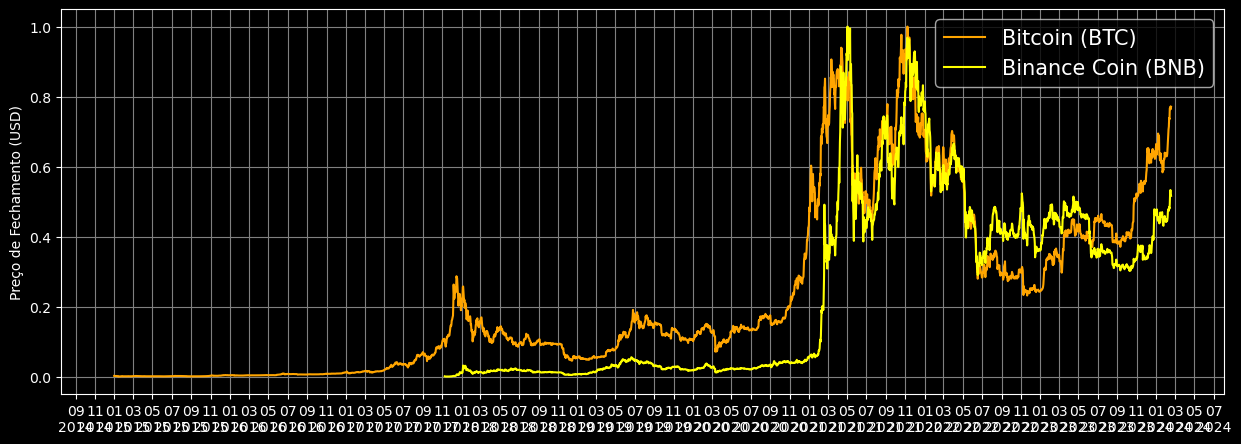

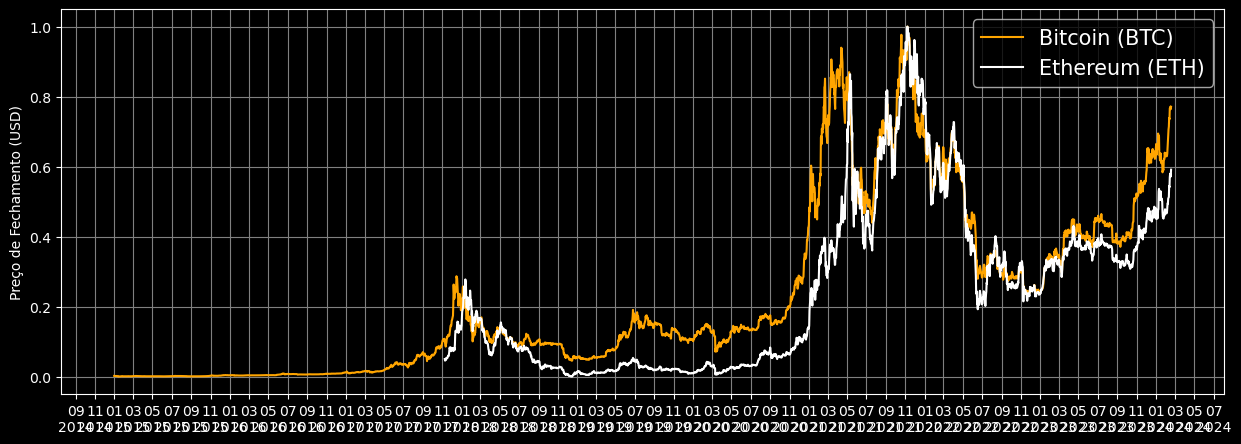

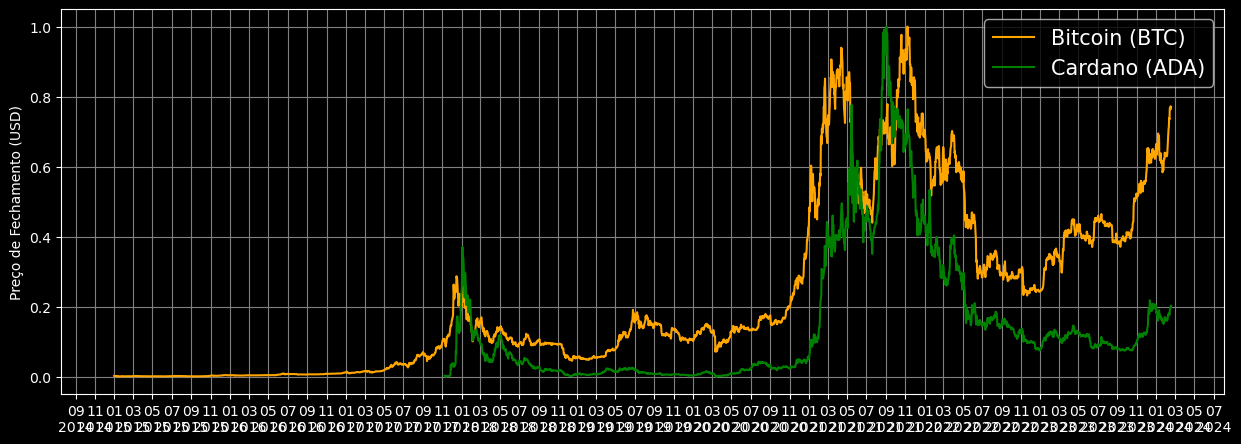

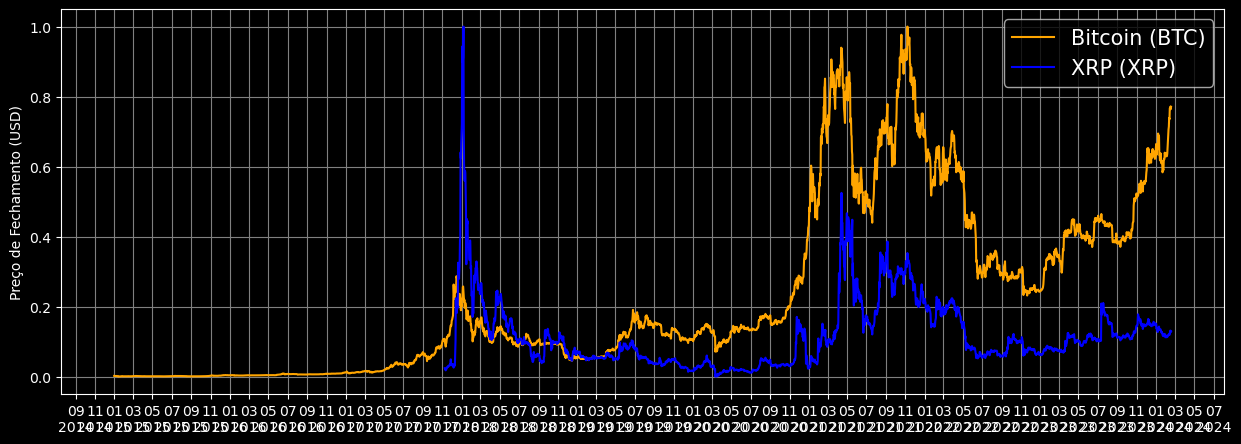

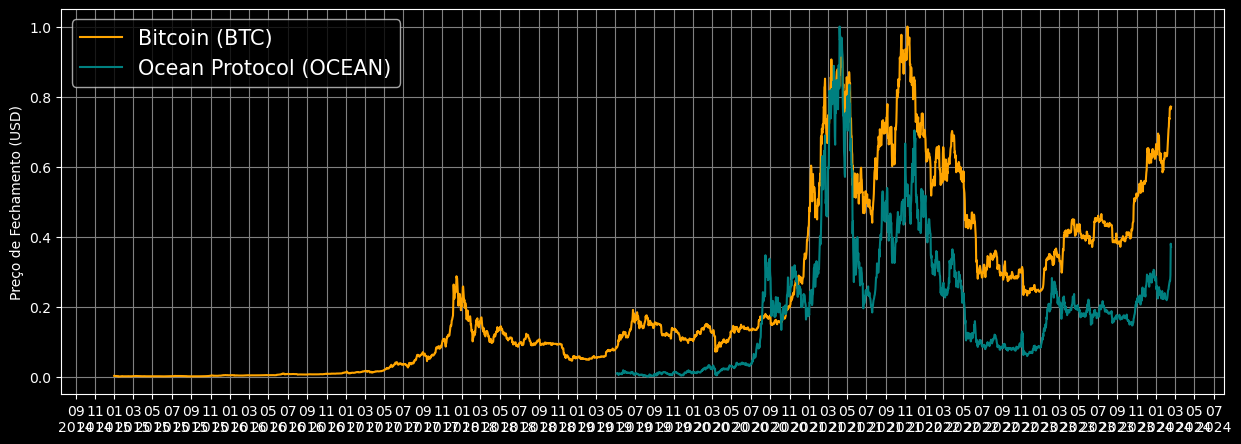

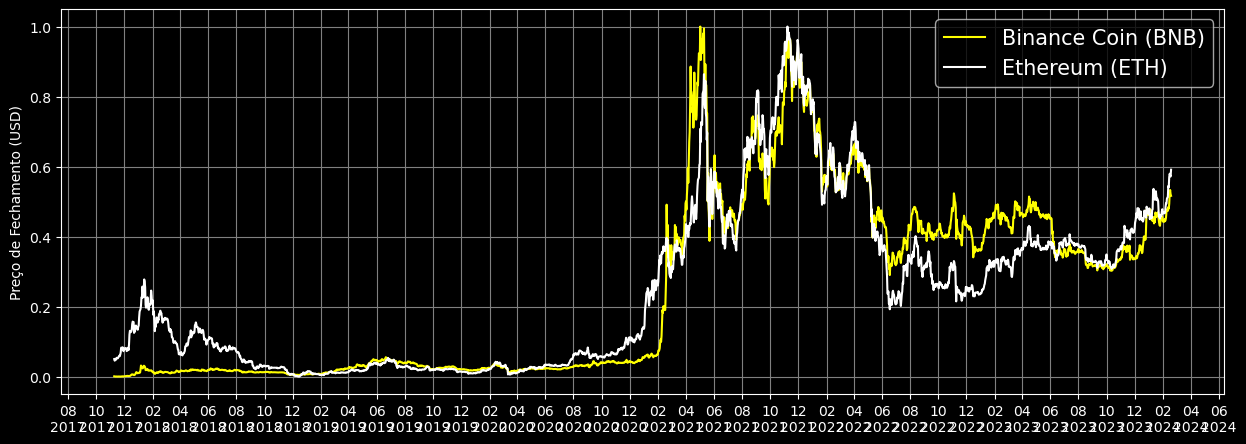

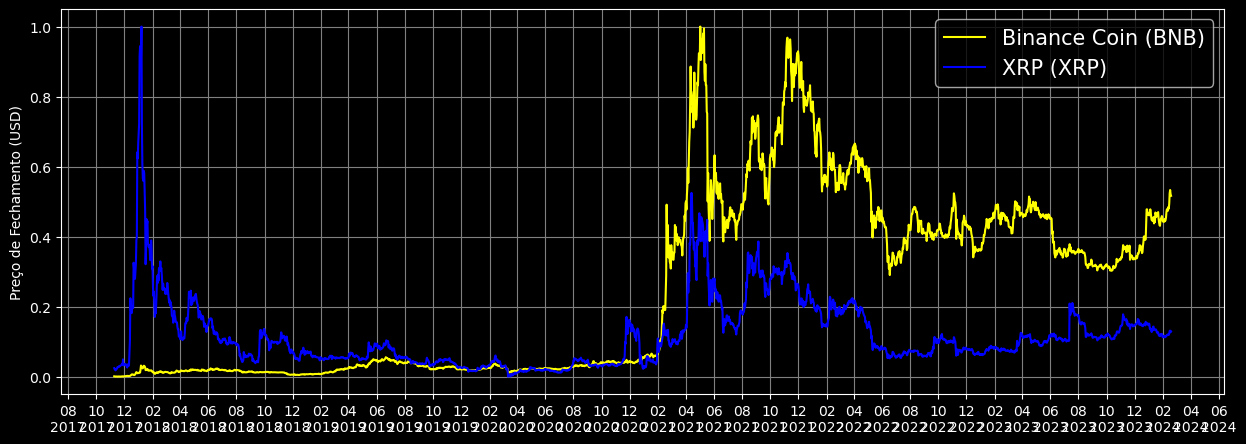

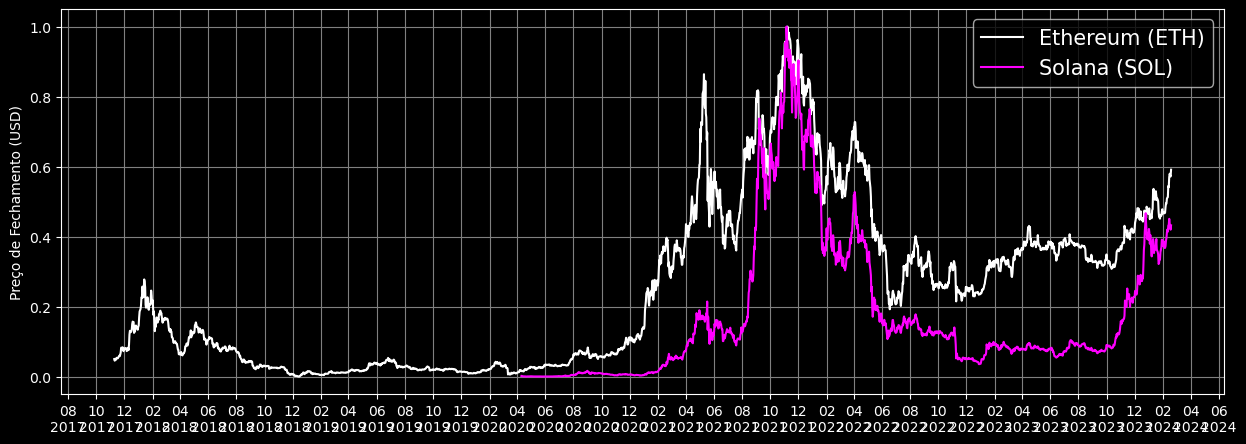

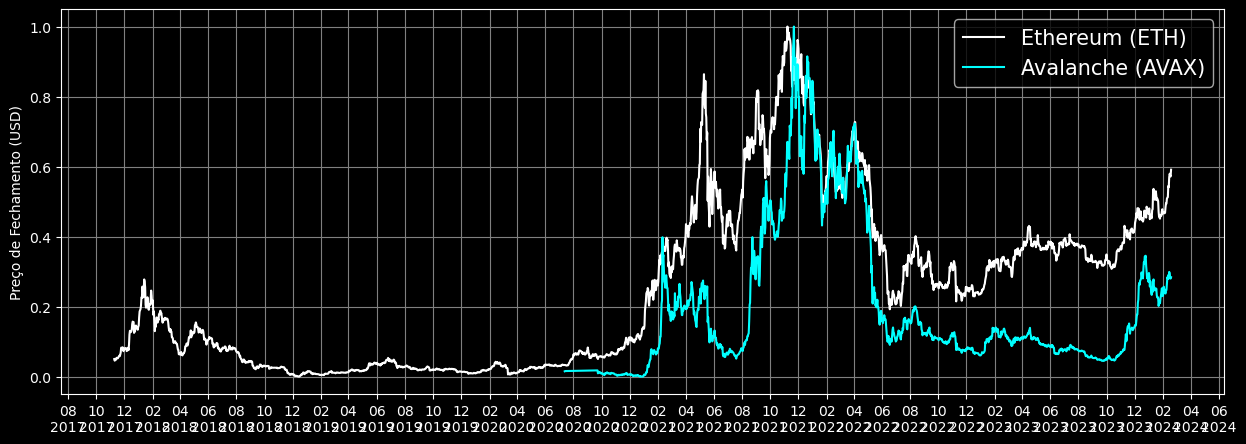

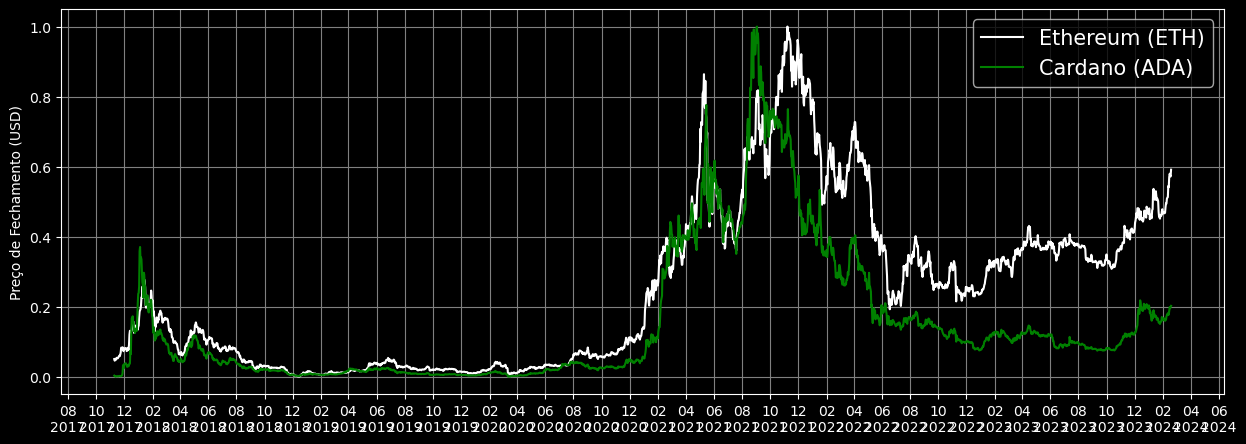

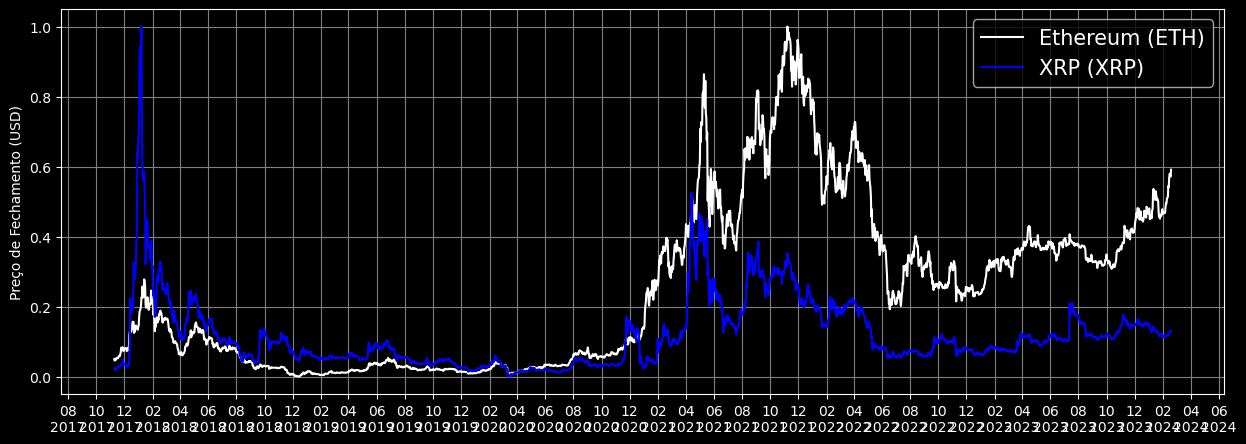

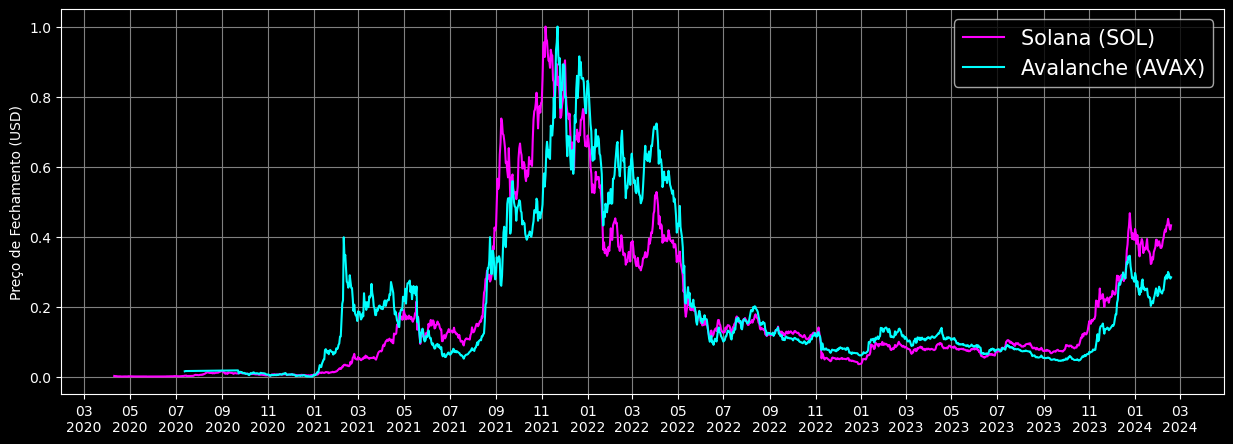

In [12]:
plt.figure(figsize=(15, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(BNB, moeda='Binance Coin (BNB)', line_color='yellow')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(ADA, moeda='Cardano (ADA)', line_color='green')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(XRP, moeda='XRP (XRP)', line_color='blue')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(OCEAN, moeda='Ocean Protocol (OCEAN)', line_color='teal')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(BNB, moeda='Binance Coin (BNB)', line_color='yellow')
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(BNB, moeda='Binance Coin (BNB)', line_color='yellow')
plot_price_joints(XRP, moeda='XRP (XRP)', line_color='blue')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plot_price_joints(SOL, moeda='Solana (SOL)', line_color='magenta')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plot_price_joints(AVAX, moeda='Avalanche (AVAX)', line_color='cyan')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plot_price_joints(ADA, moeda='Cardano (ADA)', line_color='green')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plot_price_joints(XRP, moeda='XRP (XRP)', line_color='blue')
plt.show()

plt.figure(figsize=(15, 5))
plot_price_joints(SOL, moeda='Solana (SOL)', line_color='magenta')
plot_price_joints(AVAX, moeda='Avalanche (AVAX)', line_color='cyan')
plt.show()

# ÍNDICES DO MERCADO ======================================

In [ ]:
# Lista de símbolos dos índices de mercado no Yahoo Finance
indices = {
    "^GSPC": "S&P 500", #Standard & Poor’s 500
    "^DJI": "Dow Jones Industrial Average",
    "^IXIC": "NASDAQ Composite",
    "^FTSE": "FTSE 100",
    "^GDAXI": "DAX", #Deutscher Aktienindex
    "^N225": "Nikkei 225",
    "000001.SS": "Shanghai Composite Index",
    "^FCHI": "CAC 40"
}

# Dicionário para armazenar os DataFrames
indices_dfs = {}

# Carregar dados e criar um DataFrame separado para cada índice de mercado
for symbol, name in indices.items():
    data = yf.download(symbol, start="2020-01-01", end="2024-02-09")
    indices_dfs[name] = data
    
################################################################################################

GSPC = indices_dfs["S&P 500"]
DJI = indices_dfs["Dow Jones Industrial Average"]
IXIC = indices_dfs["NASDAQ Composite"]
FTSE = indices_dfs["FTSE 100"]
GDAXI = indices_dfs["DAX"]
N225 = indices_dfs["Nikkei 225"]
SCI = indices_dfs["Shanghai Composite Index"]
FCHI = indices_dfs["CAC 40"]

indices = [GSPC, DJI, IXIC, FTSE, GDAXI, N225, SCI, FCHI]
indice_names = ["S&P 500", "Dow Jones Industrial Average", "NASDAQ Composite", "FTSE 100", 
                "DAX", "Nikkei 225", "Shanghai Composite Index", "CAC 40"]

In [ ]:
plot_price(GSPC, moeda="S&P 500", line_color='orange')
plot_price(DJI, moeda="Dow Jones Industrial Average", line_color='yellow')
plot_price(IXIC, moeda="NASDAQ Composite", line_color='white')
plot_price(FTSE, moeda="FTSE 100", line_color='magenta')
plot_price(GDAXI, moeda="DAX", line_color='cyan')
plot_price(N225, moeda="Nikkei 225", line_color='green')
plot_price(SCI, moeda="Shanghai Composite Index", line_color='blue')
plot_price(FCHI, moeda="CAC 40", line_color='purple')

# CRIPTOS E ÍNDICE ======================================

In [ ]:
################################################################################################
# MEDINDO O GRAU DE CORRELAÇÃO ENTRE AS MOEDAS E INDICES

medidas = [BTC, BNB, ETH, SOL, AVAX, ADA, XRP, RNDR, GRT, AGIX, OCEAN,
           GSPC, DJI, IXIC, FTSE, GDAXI, N225, SCI, FCHI]
names = ["BTC", "BNB", "ETH", "SOL", "AVAX", "ADA", "XRP", "RNDR", "GRT", "AGIX", "OCEAN", # CRIPTOS
                "S&P 500", "Dow Jones Industrial Average", "NASDAQ Composite", "FTSE 100", # ÍNDICES
                "DAX", "Nikkei 225", "Shanghai Composite Index", "CAC 40"] # ÍNDICES

correlation_table = pd.DataFrame(index=names, columns=names)

# Calcular a correlação entre cada par
for i, df1 in enumerate(medidas):
    for j, df2 in enumerate(medidas):
        correlation_table.iloc[i, j] = calcular_correlacao(df1, df2)

#correlation_table

################################################################################################

# REPRESENTAÇÃO GRAFICA 
# Usar Seaborn para criar o mapa de calor
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_table.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação dos Preços de Fechamento')
plt.show()

In [ ]:
STOP

In [ ]:
for i in cryptos_nome:
    print("="*100)
    
    nome = cryptos_nome[i].lower().strip().replace(" ", '')
    print(nome)
    
    ######################### MEDIDAS
    
    try:
        url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&ids="+nome+"&order=market_cap_desc&per_page=100&page=1&sparkline=false&locale=en"
        response = requests.get(url)
        data = response.json()

        # Supondo que a resposta inclua Market Cap e FDV
        market_cap = data[0]['market_cap']
        market_cap = int(market_cap)
        fdv = data[0]['fully_diluted_valuation']
        fdv = int(fdv)

        print(f"Market Cap: {market_cap}")
        print(f"Fully Diluted Valuation (FDV): {fdv}")
    except:
        print("Não encontrada")

In [ ]:
import requests

# Exemplo hipotético para obter Market Cap de CoinGecko/CoinMarketCap API
url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&ids=bitcoin"
response = requests.get(url)
data = response.json()

# Supondo que a resposta inclua Market Cap e FDV
market_cap = data[0]['market_cap']
fdv = data[0]['fully_diluted_valuation']

print(f"Market Cap: {market_cap}")
print(f"Fully Diluted Valuation (FDV): {fdv}")
